# Исследование объявлений о продаже квартир


В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, предоставленный сервисом для проекта.   

Необходимо изучить параметры продающихся объектов и выявить важные особенности ценообразования, которые существуют на рынке недвижимости.  

**ЦЕЛЬ ИССЛЕДОВАНИЯ** - проверить гипотезы:

1. Чем больше общая площадь квартиры, тем выше цена на нее.   
2. Чем больше жилая площадь квартиры, тем выше цена на нее.   
3. Чем больше площадь кухни, тем выше стоимость квартиры.   
4. Чем больше комнат, тем выше стоимость квартиры. 
5. Квартиры на первом и последнем этаже стоят дороже.
6. Самые высокие цены на квартиры в декабре.   
7. Самые дорогие квартиры находятся в Санкт-Петербурге.
8. Квартиры, расположенные ближе к центру, стоят дороже.

**ВХОДНЫЕ ДАННЫЕ**

Данные об объявлениях по продаже квартир получили из файла real_estate_data.csv.    
По каждой квартире на продажу доступны два вида данных: первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.   

**ХОД ИССЛЕДОВАНИЯ**
 
О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. Проверим их на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки. Таким образом, исследование пройдёт в четыре этапа:

1. Обзор данных;    
2. Предобработка данных;
3. Расчет необходимых параметров;
3. Исследование данных.    


### Обзор данных. 

Импортируем необходимые библиотеки для работы с данными. Считаем данные из csv-файла в датафрейм и сохраним его в переменную `data`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

import warnings
warnings.simplefilter("ignore")

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведем первые 5 строк датафрейма на экран.

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Для более детального знакомства выведем основную информацию о датафрейме с помощью метода *info().*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца. Встречаются разные типы данных в столбацах: float64, int64, object, bool.

Согласно документации:

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)  
**balcony** — число балконов  
**ceiling_height** — высота потолков (м)  
**cityCenters_nearest** — расстояние до центра города (м)  
**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)  
**first_day_exposition** — дата публикации  
**floor** — этаж   
**floors_total** — всего этажей в доме  
**is_apartment** — апартаменты (булев тип)  
**kitchen_area** — площадь кухни в квадратных метрах (м²)  
**last_price** — цена на момент снятия с публикации  
**living_area** — жилая площадь в квадратных метрах (м²)  
**locality_name** — название населённого пункта  
**open_plan** — свободная планировка (булев тип)  
**parks_around3000** — число парков в радиусе 3 км  
**parks_nearest** — расстояние до ближайшего парка (м)  
**ponds_around3000** — число водоёмов в радиусе 3 км  
**ponds_nearest** — расстояние до ближайшего водоёма (м)  
**rooms** — число комнат  
**studio** — квартира-студия (булев тип)  
**total_area** — общая площадь квартиры в квадратных метрах (м²)  
**total_images** — число фотографий квартиры в объявлении  

В названиях колонок видны нарушения стиля, над которым нужно поработать.  
Некоторые типы данных не соответствуют заявленному описанию.  
Количество заполненных значений в столбцах различается. Значит, в данных есть пропущенные значения.

Построим общую гистограмму для всех числовых столбцов таблицы:

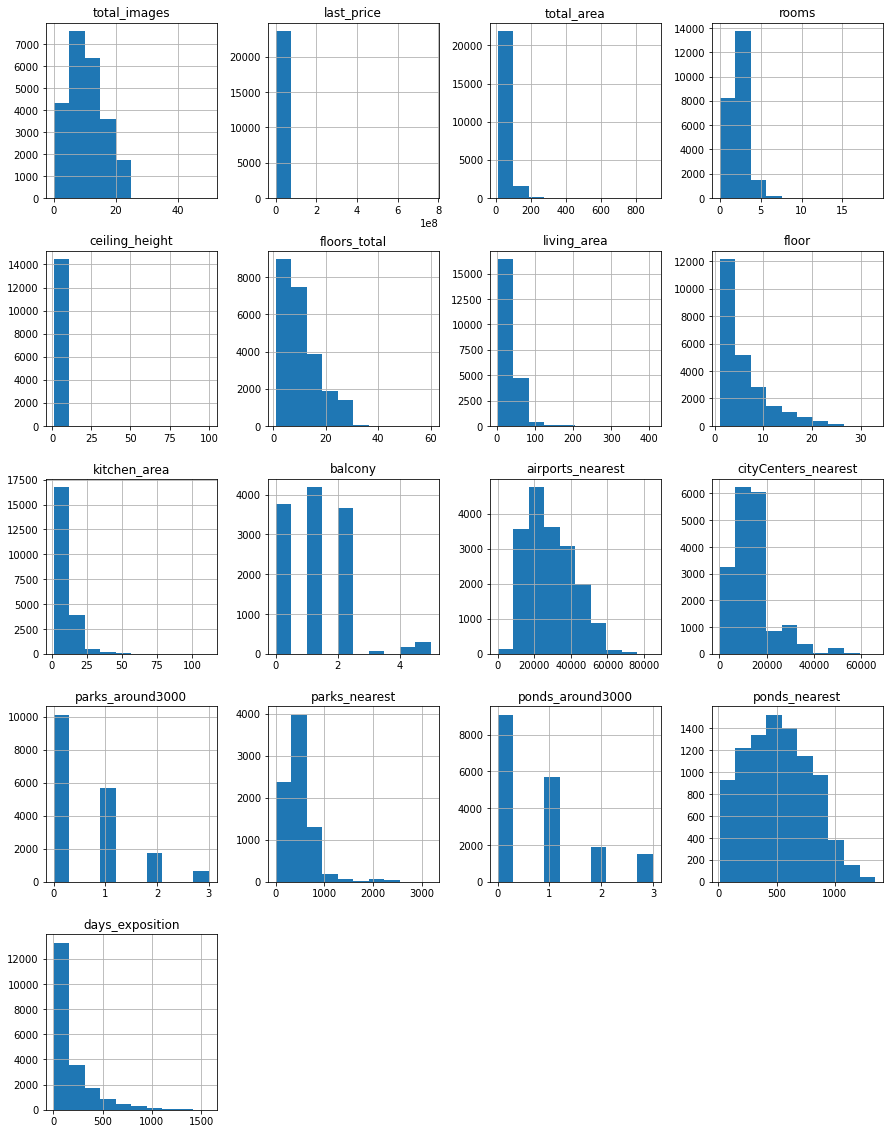

In [5]:
data.hist(figsize=(15, 20))
plt.show()

Построенные гистограммы по "сырым" данным отображают распределение числовых переменных из датафрейма `data` в диапазоне от минимального до максимального значения. Видим на многих гистограммах длинные хвосты высоких значений признака, что говорит о наличии аномальных значений. Какие-то крупномасштабные выбросы присутствуют в `last_price` и `ceiling_height`.   

Так,  при первом знакомстве с данными, можем сказать, что в датафрейме, к примеру, мало объявлений по продаже квартир с пятью и более комнатами и квартир с общей площадью более 200 кв.м.  
В датафрейме преобладают объявления по продаже квартир: расположенных ниже 10 этажа; с жилой площадью менее 100 кв.м.; с небольшой площадью кухни; без наличия парков и водоемов в радиусе 3 км; с расстоянием до ближайшего аэропорта в 20 км.  
Объявлений, которые были размещены в сервисе 500 дней и более - мало.

Но не стоит забывать, что данные построенной гистограммы дают представление о структуре данных без учета пропусков и с учетом аномалий. Стоит обратить внимание на распределения более детально, после этапа предобработки данных.

**Выводы**     
В каждой строке таблицы - данные о продаваемой недвижимости. Часть колонок описывает само объявление: дату его публикации, сколько дней оно было размещено, число фотографий квартиры в объявлении. Остальные данные рассказывают об объекте продажи: где располагается, площадь, этаж, наличие балкона и пр. Одна часть данных внесена пользователем, другая часть - получена автоматически на основе картографических данных.  
Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, с природой которых необходимо разобраться, несоответствие их типов, и в названиях колонок — расхождения с хорошим стилем. Данные проблемы нужно устранять.

### Предобработка данных

Исправим стиль в заголовках столбцов, исключим пропуски, проверим данные на дубликаты и аномалии, приведем данные к нужному типу.

#### Стиль заголовков

Выведем на экран названия столбцов:

In [6]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Приведем названия в соответствие с хорошим стилем с помощью метода *rename()* и проверим результат:

In [7]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

In [8]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Исследование и заполнение пропусков в данных

Определим в каких столбцах есть пропущенные значения и какова их доля. Сразу отсортируем полученный результат в порядке убывания методом *sort_values()*, чтобы легко видеть каких пропусков больше.

In [9]:
data.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
city_centers_nearest    0.232879
ponds_around_3000       0.232837
parks_around_3000       0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

Пропущенных значений в датафрейме, довольно много: в большинстве столбцов - они есть. Посмотрим более подробно - что делать с пропусками по каждому признаку.

**is_apartment**

Видим, что столбец с отметкой о том является ли квартира апартаментами `is_apartment` - "рекордсмен", он на 88% состоит из пропусков.  
Предполагать о том, что продавец не поставил данную отметку, потому что квартира не является апартаментами - возможно, но не логично, так как поле могло быть не обязательным для заполнения и продавец не посчитал для себя важным указывать данную информацию, либо же пустые значения появились в результате технических проблем. Оставить 12% реальных данных от генеральной совокупности - это критично мало, поэтому заполнение пропусков предположительными данными может привести к ошибочным выводам. Так как данный столбец в исследовании вряд ли поможет - его удалим:

In [10]:
data = data.drop('is_apartment', axis=1)

Проверим, что столбец удален (их должно остаться 21):

In [11]:
data.shape

(23699, 21)

---

На данном этапе для проверки оставшихся признаков создадим функцию `diff_hist`, которая для каждого выбранного признака построит гистограмму ДО заполнения пропусков и ПОСЛЕ на одной оси координат. Сделаем это с целью оценить силу, с которой заполненные пропуски влияют на изменение распределения по признаку.
Для этого создадим копию датафрейма `data_not_fill` с исходными данными, где все пропуски "на месте".

In [12]:
data_not_fill = data.copy() #копируем датафрейм с пропусками

In [13]:
# создаем функцию diff_hist
def diff_hist(old_data, new_data, col):
    # строим гистограмму по старым данным столбца:
    ax=old_data.plot(kind='hist', y=col, alpha=0.5, label='old')
    # строим гистограмму по новым данным столбца:
    new_data.plot(kind='hist', y=col, ax=ax, title=str(col)+' filling in gaps', alpha=0.3, label='new')
    plt.xlabel(str(col))
    plt.show()
    # дополнительно отобразим количество пропущенных значений до и после их заполнения:
    print('Количество пропусков до заполнения:', old_data[col].isna().sum())
    print('Количество пропусков после заполнения:', new_data[col].isna().sum())

---

**balcony**

Почти половина данных из столбца `balcony` пропущена. В данном случае, в соответствии с заданием, предположим, что если продавец не указал количество балконов, то скорее всего, в его квартире их нет. Заменим все пустые значения на 0 и проверим количество оставшихся пропусков.

In [14]:
data['balcony']=data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Применим фунцию `diff_hist`.

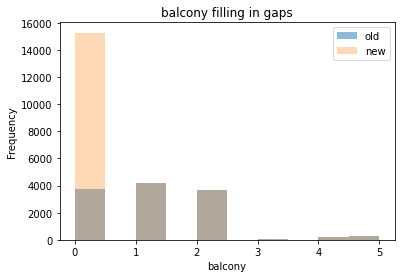

Количество пропусков до заполнения: 11519
Количество пропусков после заполнения: 0


In [15]:
diff_hist(data_not_fill, data, 'balcony')

Распределение признака теперь сильно отличается от исходного и может исказить выводы, но на данный момент оставим данные в таком виде, поскольку этого требует задание. Вернемся к ним позже.

**floors_total**

Проверим какие уникальные значения принимает признак `floor`.

In [16]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

С этажами на первый взгляд всё в порядке: пропущенных значений нет, аномальных - тоже. Используем эти данные для заполнения пропусков в `floors_total`, таких - не много всего 3%, но эти данные нужны для исследования. Поработаем в цикле с сегментами датафрейма: в строках с пропущенным значением определим тип этажа квартиры и найдем среди них медианное значение этажности дома для заполнения пропусков.

In [17]:
for f in data['floor'].unique():
    
    # на каждом шаге цикла с помощью loc выберем строки, в которых 'floor' текущий тип этажа (f) и есть пропуски в floors_total
    data.loc[(data['floor'] == f) & (data['floors_total'].isna()), 'floors_total'] =\
    data.loc[data['floor'] == f, 'floors_total'].median()
    # записываем в них медианное значение 'floors_total' среди строк с текущим типом этажа
    
#проверяем, что все пропуски заполнены
data['floors_total'].isna().sum()

0

С целью удостовериться в корректности логики заполнения сделаем еще одну проверку: этаж объекта не может быть выше общей этажности дома. Проверим это условие:

In [18]:
len(data[data['floor'] > data['floors_total']])

0

Таких объектов не обнаружено, всё заполнилось корректно. Применим фунцию `diff_hist`.

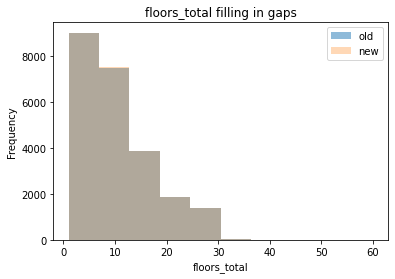

Количество пропусков до заполнения: 86
Количество пропусков после заполнения: 0


In [19]:
diff_hist(data_not_fill, data, 'floors_total')

Заполнение почти никак не повлияло на исходное распределение, они практически совпадают (так как пропусков изначально было мало), поэтому заполненные значения оставляем. Переходим к следующему признаку.

**ceiling_height**

Что касается высоты потолков `ceiling_height`, то здесь пропущен высокой процент значений (38%) - есть вероятность, что пользователь их просто не указал в объявлении, либо произошел технический сбой во время записи, выгрузке/загрузке данных.  
Выведем описательную статистику по столбцу и моду:

In [20]:
print('mode', data['ceiling_height'].mode())
data['ceiling_height'].describe()

mode 0    2.5
dtype: float64


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видим, что минимальное и максимальное значение похожи на выбросы (с ними поработаем на следующем этапе), поэтому среднее значение использовать не можем - оно будет смещено. Среднее значение - 2.77, медиана - 2.65, мода - 2.50. Для высоты потолков разница между ними существенная. Если выберем медиану, то характер распределения сильно пострадает - сместится мода; если моду - то слишком на большое число случаев ее увеличим и данные потеряют реалистичность.  
Высота потолков, вероятно, зависит от типа постройки, но такими данными в исследовании  не обладаем. Этажность дома может быть второстепенно связана с типом постройки (например, все знают, что "хрущевка" - 5-этажная, а высота потолков там около 2,5 метров и т.п.). Поэтому попробуем сгруппировать данные по признаку этажности дома и посчитать медиану среди группы.

In [21]:
data.groupby('floors_total')['ceiling_height'].median()

floors_total
1.0      2.80
2.0      2.70
3.0      2.80
4.0      3.00
5.0      2.55
6.0      3.00
7.0      3.00
8.0      2.80
9.0      2.55
10.0     2.60
11.0     2.75
12.0     2.65
13.0     2.70
14.0     2.60
15.0     2.70
16.0     2.70
17.0     2.70
18.0     2.70
19.0     2.75
20.0     2.75
21.0     2.70
22.0     2.75
23.0     2.75
24.0     2.75
25.0     2.75
26.0     2.66
27.0     2.70
28.0     2.60
29.0     2.60
33.0      NaN
34.0     2.65
35.0     2.70
36.0    14.85
37.0     1.75
52.0     2.65
60.0     2.88
Name: ceiling_height, dtype: float64

В целом, выглядит реалистично. За исключением 33 и 36-этажного дома. Посмотрим что с ними не так:

In [22]:
data[data['floors_total']==36]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,NaN,36.0,21.4,28,False,False,18.7,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22T00:00:00,2,2.7,36.0,40.0,29,False,False,12.0,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN


Судя по квартире со схожими параметрами, можем предположить, что высота потолка 2.7, а не 27 метров, вероятно продавец ошибся с запятой. Заменим это значение.

In [23]:
data.loc[5807, 'ceiling_height'] = 2.7

Проверим сколько объектов продается в 33-этажных домах:

In [24]:
len(data[data['floors_total']==33])

1

Оказывается, он один такой и с пустым значением. Поэтому заполним "вручную" значение этой ячейки медианой соседней группы (среди 34-этажных домов) - 2.65

In [25]:
data.loc[11575, 'ceiling_height'] = 2.65

Но есть еще одна особенность: в силу исторических обстоятельств вспомним, что  что в Петербурге можно встретить дома с большой высотой потолков не только в пентхаусах, но и в старом петербуржском фонде: встречаются дома, в которых высота потолков достигает даже 9 м. Выведем медианную высоту потолков по тем данным, которые имеются по г. Санкт-Петербург.

In [26]:
data[data['locality_name']=='Санкт-Петербург']['ceiling_height'].median()

2.7

В половине объявлений Петербурга высота потолков не превышает и 3-х метров, поэтому  заполним значения столбца медианным значениям групп по этажности дома и проверим количество оставшихся пропусков.

In [27]:
data['ceiling_height']=data.groupby('floors_total')['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].isna().sum()

0

Применим фунцию `diff_hist`.

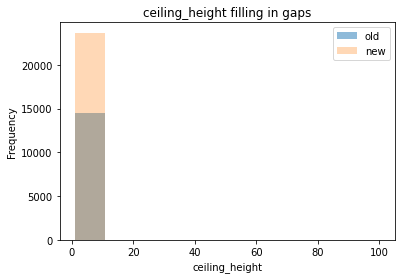

Количество пропусков до заполнения: 9195
Количество пропусков после заполнения: 0


In [28]:
diff_hist(data_not_fill, data, 'ceiling_height')

Детализируем гистограмму: ограничим показатели от 2 до 5 метров:

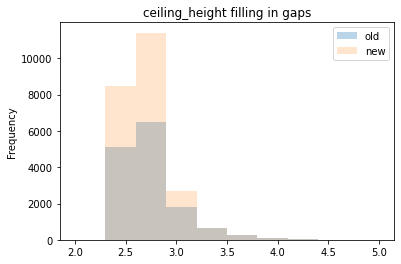

In [29]:
ax=data_not_fill.plot(kind='hist', y='ceiling_height', range=(2,5), alpha=0.3, label='old')
data.plot(kind='hist', y='ceiling_height', range=(2,5), ax=ax, title='ceiling_height filling in gaps', alpha=0.2, label='new')
plt.show()

В целом, форма распределения не нарушилась, оставим так.

**living_area, kitchen_area**

Видим, что общая площадь квартиры `total_area` заполнена полностью, а вот жилая `living_area` и площадь кухни `kitchen_area ` - имеют пропуски, которые попробуем восстановить.   
Чтобы понимать разницу этих понятий обратимся к внешним источникам. *Жилая площадь* – это сумма площадей жилых комнат. *Общая площадь квартиры* – это сумма площадей всех комнат, составляющих данную квартиру, в том числе подсобных помещений, кроме лоджий, балконов, веранд и террас. К подсобным помещениям относятся площади кухонь, коридоров, ванных, санузлов, встроенных шкафов, кладовых, а также площадь, занятая внутриквартирной лестницей.     
Теперь сгруппируем квартиры по числу комнат и в каждой группе найдем среднюю жилую площадь и среднюю площадь кухни. Ими заполним пропуски.

In [30]:
# заполняем пропуски в жилой площади и проверяем результат оставшихся пропусков
data['living_area']=data.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))
data['living_area'].isna().sum()

0

Применим фунцию `diff_hist`.

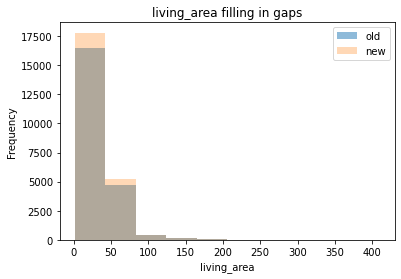

Количество пропусков до заполнения: 1903
Количество пропусков после заполнения: 0


In [31]:
diff_hist(data_not_fill, data, 'living_area')

Характер распределения не изменился. Аналогичным образом заменим значения в `kitchen_area`, но для начала разберемся не связаны ли пропуски с тем, что это квартира-студия и в ней нет отдельной кухни, а есть лишь кухонная зона. Посчитаем сколько студий в датафрейме:

In [32]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

Всего 149 объявлений. Проверим сколько из них с пропусками по площади кухни:

In [33]:
data[data['studio'] == True]['kitchen_area'].isna().sum()

149

Всё верно, эти значения пропущены не случайно, в студии нет отдельной кухни, но что инересно - пропусков в целом по столбцу намного больше.  
*В строительных нормах и правилах Российской Федерации определение квартиры-студии не закреплено, по документам она считается однокомнотной квартирой. Согласно строительным нормам и правилам, площадь кухни в  однокомнатной квартире должна быть не менее — 5 квадратных метров* - это единственное требование.  
Не отмечать площадь кухни в квартире-студии не совсем справедливо, ведь кухонная зона в них есть, поэтому заполним эти пропуски на общих основаниях.  
На практике, размер кухни может зависеть от типа и года постройки информации о которых в датафрейме нет, поэтому используем группировку по количеству комнат, вне зависимости является ли квартира студией.

In [34]:
# заполняем пропуски в площади кухни и проверяем результат оставшихся пропусков
data['kitchen_area']=data.groupby('rooms')['kitchen_area'].apply(lambda x: x.fillna(x.median()))
data['kitchen_area'].isna().sum()

197

Какие-то из срезов оказались пусты и заполнить их нечем, поэтому осталось 197 пропусков. 197 пропусков из 23 тыс. наблюдений - не критично.

Применим функцию `diff_hist`

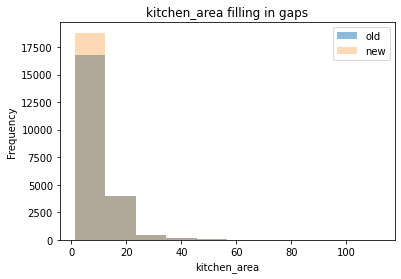

Количество пропусков до заполнения: 2278
Количество пропусков после заполнения: 197


In [35]:
diff_hist(data_not_fill, data, 'kitchen_area')

Видим допустимое увеличение моды. Переходим к следующему показателю.

**locality_name**

Для продолжения исследования пропущенных значений, необходимо проверить на неявные дубликаты столбец `locality_name`, переменная которая является категориальной. Для этого выведем отсортированный список его уникальных значений.

In [36]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Видим неявные дубликаты. В первую очередь заменим слово "посёлок" на "поселок".

In [37]:
data['locality_name']=data['locality_name'].str.replace('посёлок', 'поселок')

Согласно внешним источникам, *городской посёлок — тип населённого пункта в Белоруссии, России и Эстонии, то же, что и посёлок городского типа*, поэтому среди них тоже поищем неявные дубликаты. Также заменим "поселок станции" на "поселок при железнодорожной станции", "садовое товарищество" - на "садоводческое некоммерческое товарищество".

In [38]:
data['locality_name']=data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name']=data['locality_name'].str.replace('поселок станции', 'поселок при железнодорожной станции')
data['locality_name']=data['locality_name'].str.replace('садовое товарищество', 'садоводческое некоммерческое товарищество')
data['locality_name']=data['locality_name'].str.replace('поселок городского типа Рябово', 'поселок Рябово')

In [39]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Так выглядит лучше. Посмотрим сколько 'nan' в этом столбце. 

In [40]:
data['locality_name'].isna().sum()

49

Неизвестно по какой причине в 49 объявлениях не указан город. Территориальная принадлежность объекта продажи в исследовании может сыграть ключевую роль. Без указания населенного пункта данные теряют смысл для исследования, восстановить их сложно, поэтому их удалим из датафрейма.

In [41]:
data.dropna(subset=['locality_name'], inplace=True)
data.shape

(23650, 21)

#### Категоризация данных

Попутно создадим функцию, которая разделит населенные пункты на категории, для дальнейшего использования и применим ее к столбцу `locality_name`, результат запишем в новый столбец `locality_category` и выведем на экран случайные 5 срок таблицы для проверки:

In [42]:
def categorize_locality(row):
    try:
        if 'деревня' in row:
            return 'деревня'
        elif 'Санкт-Петербург' in row:
            return 'город федерального значения'  
        elif 'село ' in row or 'коттеджный' in row or 'садоводческое некоммерческое товарищество' in row: #объединим мелкие группы
            return 'другое'          
        elif 'поселок городского' in row:
            return 'ПГТ'            
        elif 'поселок ' in row: #включая поселки на ж/д станции           
            return 'поселок'
        return 'город'           
    except:
        return 'нет категории'
    
data['locality_category']=data['locality_name'].apply(categorize_locality) #применяем функцию

In [43]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category
13194,16,32000000.0,119.0,2018-02-27T00:00:00,3,3.1,9.0,75.0,7,False,False,19.0,0.0,Санкт-Петербург,26055.0,4800.0,1.0,648.0,1.0,779.0,181.0,город федерального значения
7545,13,5350000.0,50.0,2014-12-08T00:00:00,1,3.3,5.0,27.0,2,False,False,11.0,0.0,Санкт-Петербург,20820.0,6218.0,1.0,409.0,2.0,309.0,864.0,город федерального значения
4320,20,19700000.0,146.3,2017-02-10T00:00:00,3,3.4,6.0,55.8,6,False,False,56.2,0.0,Санкт-Петербург,23312.0,2450.0,1.0,548.0,3.0,883.0,638.0,город федерального значения
1906,13,3490000.0,44.1,2018-04-28T00:00:00,1,3.0,6.0,20.3,1,False,False,8.7,0.0,поселок Шушары,17472.0,31582.0,0.0,NaN,0.0,NaN,289.0,поселок
8653,10,4200000.0,37.1,2017-07-20T00:00:00,1,2.7,27.0,14.1,18,False,False,12.0,0.0,поселок Парголово,52480.0,18657.0,0.0,NaN,0.0,NaN,202.0,поселок


Категории получены, посмотрим на их численность:

In [44]:
data['locality_category'].value_counts()

город федерального значения    15721
город                           4287
поселок                         2109
деревня                          945
ПГТ                              548
другое                            40
Name: locality_category, dtype: int64

Подавляющая часть объявлений о продажах квартир (66%) сосредоточена в Санкт-Петербурге.

#### Работа с пропусками (продолжение)

Вернемся к пропускам, теперь оценим картографические данные.

**airports_nearest, /  city_centers_nearest, /  ponds_around_3000,  / parks_around_3000**

Интересен тот факт, что в вышеперечисленных значениях одинаковый процент пропусков. Из описания задачи известно, что все эти колонки с картографической информацией заполняются автоматически, следовательно стоит поискать причину их незаполнения.  
Вероятно, что картографическая информация идентифицируется через местоположение, соответственно причины могут крыться в неточностях названий населенного пункта объявления `locality_name `, либо в его размерах и степени развитости инфраструктуры.   
Сделаем одновременный срез датафрейма по пропущенным значениям в картографических колонках и посмотрим какие населенные пункты в них фигурируют.

In [45]:
df=data[
    (data['airports_nearest'].isna()) &
    (data['city_centers_nearest'].isna()) &
    (data['ponds_around_3000'].isna()) &
    (data['parks_around_3000'].isna())
]

In [46]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
studio                     0
open_plan                  0
kitchen_area              79
balcony                    0
locality_name              0
airports_nearest        5510
city_centers_nearest    5510
parks_around_3000       5510
parks_nearest           5510
ponds_around_3000       5510
ponds_nearest           5510
days_exposition          864
locality_category          0
dtype: int64

Убедились, что во всех этих признаках одинаковое количество пропущенных значений, значит наше предположение - верно.  
Теперь проверим из каких категорий населенных пунктов больше всего пропусков, результат представим в виде диаграммы:

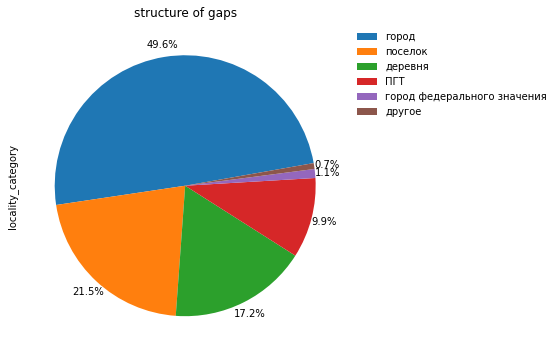

In [47]:
df['locality_category'].value_counts().plot(
    kind='pie', figsize=(6,6), autopct='%1.1f%%', pctdistance=1.1, startangle=10, labeldistance=None
)
plt.legend(frameon=False, bbox_to_anchor=(1, 1))
plt.title('structure of gaps')
plt.show()

Картина достаточно логичная: как мы видим почти все пропущенные значения - это не крупные населенные пункты: небольшие города, поселки, деревни. Логично, что в них может совсем не быть аэропорта, или водоема, к примеру. А возможно, картографический сервис не имеет информации о слабонаселенных местах, поэтому ее не "подтянул".   
В такой ситуации ясно одно: восстанавливать пропуски в этих данных не имеет смысла, поскольку это может привести к искажению реального результата, оставляем без изменений.

**parks_nearest, / ponds_nearest**

Что касается этих переменных, то напрашивается вывод, что пропущенные значения точно будут по тем строкам, в которых картографические данные отсутствуют (видели это, когда выводили сумму пропущенных значений в предыдущем блоке), или, например, нет ни одного парка или водоема в радиусе 3 км. Проверим это предположение. Сделаем срез датафрейма и проверим какие уникальные значения принимают `ponds_around_3000` и `parks_around_3000`.

In [48]:
print('Парки:', data[data['parks_nearest'].isna()]['parks_around_3000'].unique())
print('Водоемы:', data[data['ponds_nearest'].isna()]['ponds_around_3000'].unique())      

Парки: [ 0. nan]
Водоемы: [ 0. nan]


In [49]:
print('Максимальное расстояние до ближайшего парка:',data['parks_nearest'].max())
print('Максимальное расстояние до ближайшего водоема:', data['ponds_nearest'].max())

Максимальное расстояние до ближайшего парка: 3190.0
Максимальное расстояние до ближайшего водоема: 1344.0


Видим, что так и есть: природа около 60% пропусков становится понятна. Важно определиться что считать "ближайшим" парком или водоёмом. Исходя из максимальных значений показателей понимаем, что "ближайшим" парком и водоёмом будет считаться тот, который как раз находится в радиусе 3 км. Логично, что если их количество в этом радиусе равно 0, то и расстояния не должно быть, поэтому пропуски заполнять не будем.

**days_exposition**


Исследуем последний признак `days_exposition` на пропуски. Первое, что видим - 13% пропущенных значений. Это может означать, что либо объект еще не продан и не снят с продажи, либо природа - в техничской ошибке. Восстановливать пропуски в данном случае - не целесообразно, поскольку объявление могло быть еще действующим на момент выгрузки архива.

#### Изменение типов данных

Еще раз выведем типы данных на экран:

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   studio                23650 non-null  bool   
 10  open_plan             23650 non-null  bool   
 11  kitchen_area          23453 non-null  float64
 12  balcony               23650 non-null  float64
 13  locality_name         23650 non-null  object 
 14  airports_nearest      18116 non-null  float64
 15  city_centers_neares

Видим проблемы в `first_day_exposition`, `floors_total`, `balcony`. В столбце `days_exposition` изменить тип на целочисленный не получится, поскольку в нем присутствует Nan. Изменим типы в перечисленных столбцах:

In [51]:
# меняем тип данных на целочисленный
data['floors_total']=data['floors_total'].astype(int)
data['balcony']=data['balcony'].astype(int)
# меняем тип данных на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [52]:
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город федерального значения


In [53]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
locality_category               object
dtype: object

Типы данных изменены. Особенно было важным изменить тип даты на datetime, так как с ним теперь можно производить различные операции: например, "вытаскивать" день, месяц или год, округлять время, переводить его в другой часовой пояс и т.п.  
Этажность дома и число балконов лучше все-таки измерять в целых числах.

#### Проверка на дубликаты

In [54]:
data.duplicated().sum()

0

В результате проверки, строки-дубликаты не выявлены. Неявные дубликаты в названии населенных пунктов обработаны ранее.

#### Обработка аномальных значений

Работа с аномальными значениями - важный этап, поскольку они влияют на средние показатели, характер распределения и однородность совокупности. Их учёт в исследовании может привести к ошибочным выводам, далёким от реальности. Но в то же время важно найти баланс в исключении аномалий из исследования, и случайно не поставить в привелегированное положение какой-то признак, который станет влиять на результат в большей степени, чем должен. Для получения общей картины выведем описательные статистики для всех столбцов обработанного датафрейма в транспонированном виде для лучшего восприятия:

In [55]:
pd.options.display.float_format = '{: .2f}'.format
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
total_images,23650.00,9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,23650.00,6541126.90,10896399.18,12190.00,3400000.00,4650000.00,6799000.00,763000000.00
total_area,23650.00,60.33,35.66,12.00,40.00,52.00,69.70,900.00
rooms,23650.00,2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,23650.00,2.73,0.98,1.00,2.55,2.65,2.75,100.00
floors_total,23650.00,10.68,6.60,1.00,5.00,9.00,16.00,60.00
living_area,23650.00,34.31,21.71,2.00,18.40,30.30,42.70,409.70
floor,23650.00,5.89,4.88,1.00,2.00,4.00,8.00,33.00
kitchen_area,23453.00,10.46,5.66,1.30,7.30,9.04,11.50,112.00
balcony,23650.00,0.59,0.96,0.00,0.00,0.00,1.00,5.00


Первое, что стоит отметить - это огромный разброс цены(от 12 тыс до 763 млн.), с которой нужно поработать, также проблемы с расстоянием до аэропорта и до центра и в размерах площади.     
Многие минимальные и максмальные значения по признаку очень похожи на выбросы, огромное стандартное отклонение это только подтверждает, оно нам говорит о неоднородности совокупности.  
Для оценки наличия выбросов по исследуемым признакам выведем поочередно описательную статистику и построим диаграмму размаха, используя функцию `describe_anomalies`:

In [56]:
def describe_anomalies(df, col):
    print('Описание данных:')
    print(df[col].describe())
    print()
    print('Диаграмма размаха:')
    print('anomalies_line_upper:', 1.5*((df[col].quantile(q=0.75))-(df[col].quantile(q=0.25)))+df[col].quantile(q=0.75))
    print('anomalies_line_lower:', 1.5*((df[col].quantile(q=0.25)) - (df[col].quantile(q=0.75)))+df[col].quantile(q=0.25))
    df.boxplot(col)
    plt.title(str(col)+' anomalies', color='green')
    plt.ylabel(str(col)+' amount')
    plt.show()

**rooms**

Прежде, чем перейти к цене получим представление об объектах продажи.   
Оценим выбросы по числу комнат.

Описание данных:
count    23650.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

Диаграмма размаха:
anomalies_line_upper: 6.0
anomalies_line_lower: -2.0


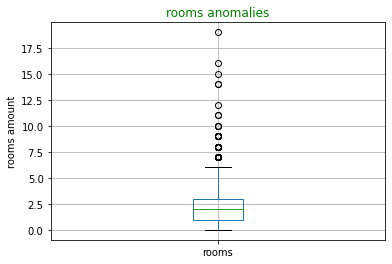

In [57]:
describe_anomalies(data, 'rooms')

У большинства продавцов квартиры состоят из 2-3 комнат.   
Количество комнат `rooms` более 6 выглядит как выбросы. Проверим сколько таких объектов в датафрейме.

In [58]:
len(data[data['rooms'] > 6])

90

Странно, что есть квартиры, состоящие из 0 комнат - возможно, это так обозначены квартиры-студии, или, например, квартиры с открытой планировкой. Проверим это предположение:

In [59]:
print('Число квартир, состоящих из 0 комнат:', len(data[data['rooms']==0]))

# посчитаем сколько квартир-студий и квартир с открытой планировкой в датафрейме в разбивке по числу комнат
data.pivot_table(index='rooms', values=['studio', 'open_plan'], aggfunc='sum', margins=1)

Число квартир, состоящих из 0 комнат: 197


,open_plan,studio
rooms,,
0,59,138
1,3,11
2,1,0
3,2,0
4,1,0
5,1,0
6,0,0
7,0,0
8,0,0


Из сводной таблицы видно, что все 197 квартир с 0 комнат - это либо квартиры-студии, либо квартиры с открытой планировкой. Предположение оказалось верным.  
Видим, среди квартир открытого плана встречаются квартиры с разным количеством комнат. А вот 11 квартир-студий отнесены к однокомнатным квартирам, что логически верно. Но для целей исследования все квартиры-студии заменим на число комнат 0 и будем знать, какие квартиры находятся в этой группе. 

In [60]:
data['rooms']=data['rooms'].where((data['studio'] != True), other=0)
print('Число квартир, состоящих из 0 комнат:', len(data[data['rooms']==0]))

Число квартир, состоящих из 0 комнат: 208


Отсекаем всё, что больше 6 комнат как выбросы:

In [61]:
data=data[data['rooms'] <= 6]
data.shape

(23560, 22)

**total_area**

Описание данных:
count    23560.00
mean        59.49
std         32.02
min         12.00
25%         40.00
50%         52.00
75%         69.10
max        507.00
Name: total_area, dtype: float64

Диаграмма размаха:
anomalies_line_upper: 112.74999999999999
anomalies_line_lower: -3.6499999999999915


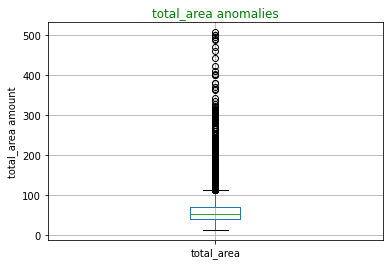

In [62]:
describe_anomalies(data, 'total_area')

Из описательной статистики следует, что у 3/4 продавцов общая площадь продаваемых квартир не превышает 70 кв. метров.   Интересно, что есть в объявлениях квартиры общей площадью более 500 кв. метров. Судя по рынку жилья такие квартиры в реальности  действительно существуют. Но это,скорее, элитная недвижимость - сверхдорогостоящая, которой в нашем датасете не очень много, и если такие объекты оставить, то показатели по генеральной совокупности исказятся.  
**Элитное жильё существует и исследовать его тоже интересно и важно, но лучше это сделать отдельно, среди аналогичных вариантов.**  
В данном случае важно понимать, что общая площадь квартиры, вероятно, должна быть связана с числом комнат. На следующем шаге проследим как проявит себя признак, а сейчас отсекем всё, что больше 120 кв.м.

In [63]:
data=data[data['total_area']<=120]
data.shape

(22590, 22)

**last_price**

Теперь, когда владеем информацией о количестве комнат и общей площади можем поработать с самым "проблемным" столбцом `last_price`. Еще раз выведем обновленное описание по нему:

In [64]:
data['last_price'].describe()

count       22590.00
mean      5382099.66
std       3543825.63
min         12190.00
25%       3390000.00
50%       4500000.00
75%       6350000.00
max      82000000.00
Name: last_price, dtype: float64

В 75% объявлений цена не превышает 6.5 млн. рублей. В то время как максимальная цена - 82 млн. рублей. Это уже не 763 млн. как было изначально, но после ограничения количества комнат и общей площади такие высокие цены исчезли -  можем говорить, что это действительно было сверхдорогостоящее жилье, которому следует посвятить отдельное исследование. По-прежнему видим большое стандартное отклонение, что свидетельствует о неоднородности совокупности.   
Может ли квартира иметь стоимость 82 млн. - конечно, да, если она расположена близко к центру Санкт-Петербурга с большой площадью вблизи парков и водоемов.
Но вот квартира за 12190.00 рублей точно не продается какой бы населенный пункт не был, есть вероятность, что продавец ошибся в единицах  измерения стоимости квартиры и указал в тыс.тыс, например. Выведем на экран эти строки:

In [65]:
data[(data['last_price']== 82000000.00) | (data['last_price'] < 400000.00)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category
6462,2,82000000.00,114.00,2015-12-17,3,2.55,5,78.50,4,False,False,20.00,0,Санкт-Петербург,22460.00,3400.00,2.00,218.00,3.00,69.00,651.00,город федерального значения
8793,7,12190.00,109.00,2019-03-20,2,2.75,25,32.00,25,False,False,40.50,0,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8.00,город федерального значения


Квартира за 82 млн. действительно с немаленькой общей площадью, расположена близко к центру Санкт-Петербурга вблизи парков и водоемов, но в любом случае это  похоже на выброс для исследуемой выборки: у большинства продавцов таких высоких цен нет.  
Дешевле 400 тыс. рублей (меньше дом стоить точно не будет, даже если территориально он расположен в деревне) - только квартира за 12 тыс. Построим диаграмму размаха.

anomalies_line_upper: 10790000.0


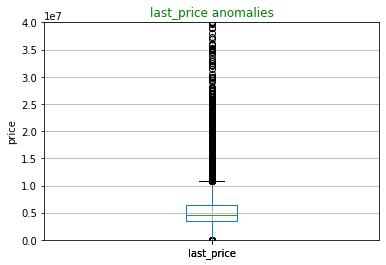

In [66]:
print('anomalies_line_upper:', 1.5*((data['last_price'].quantile(q=0.75))-(data['last_price'].quantile(q=0.25)))+data['last_price'].quantile(q=0.75))
data.boxplot('ceiling_height')
data.boxplot('last_price')
plt.title('last_price anomalies', color='green')
plt.ylim(0,40000000)
plt.ylabel('price')
plt.show()

In [67]:
data=data[data['last_price']!=12190.00]

Убрали квартиру за 12 тыс из базы.  
Медиана - около 5 млн. рублей. Верхний ус упирается примерно в 11 млн. рублей. Более высокие значения сливаются в одну линию, значит выбросов очень много, но всё же встречаются они относительно редко. Посчитаем сколько таких редких значений в таблице:

In [68]:
len(data[data['last_price'] > 10790000.00])

1460

6% значений, что не мало.   
Чтобы понять какие цены все-таки можно считать допустимыми посмотрим примерную статистику по рынку жилья во внешних источниках, и учтем один момент: цены динамичны и изменяются во времени, поэтому проверим за какой период хранятся объявления в датафрейме. 

In [69]:
data['first_day_exposition'].dt.year.sort_values().unique()

array([2014, 2015, 2016, 2017, 2018, 2019])

Данные за 6 лет.   
Посмотрим статистику рыночных цен на квартиры в Санкт-Петербурге за 2019 год. Согласно данным https://www.realtymag.ru/sankt-peterburg/kvartira/prodazha/prices/2019 средняя цена на рынке вторичного жилья за квадратный метр в 2019 году составила 115 тыс. рублей (на новостройку - 109 тыс. руб.) - для оценки возьмем среднее из них. Так как верхний ус в `total_area` упирается примерно в границу 113 кв. метров, то стоимость рассчитаем следующим образом: 112000 руб. * 113 кв. м. = 12,656 млн. рублей.     
Показатели получились примерно соизмеримы. Поскольку оценка примерная, осредненная и расчитана по крайнему периоду времени, то ограничим совокупность границой диаграмы размаха.

In [70]:
# вычисляем первый квартиль
q1 = data['last_price'].quantile(0.25)
# вычисляем третий квартиль
q3 = data['last_price'].quantile(0.75)
# вычисляем межквартильный размах
IQR = q3-q1

In [71]:
# отсекаем выбросы по last_price:
data=data.query('last_price <= (@q3 + 1.5*@IQR)')
data.shape

(21129, 22)

**ceiling_height**

Строим диаграмму размаха:

count    21129.00
mean         2.70
std          0.78
min          1.00
25%          2.55
50%          2.64
75%          2.75
max         32.00
Name: ceiling_height, dtype: float64

anomalies_line_upper: 3.0500000000000003
anomalies_line_lower: 2.2499999999999996


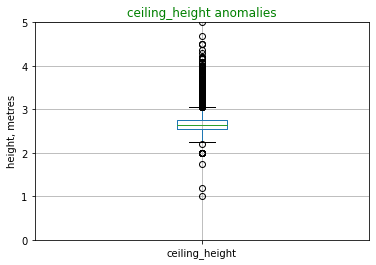

In [72]:
print(data['ceiling_height'].describe())
print('')
print('anomalies_line_upper:', 1.5*((data['ceiling_height'].quantile(q=0.75))-(data['ceiling_height'].quantile(q=0.25)))+data['ceiling_height'].quantile(q=0.75))
print('anomalies_line_lower:', 1.5*((data['ceiling_height'].quantile(q=0.25)) - (data['ceiling_height'].quantile(q=0.75)))+data['ceiling_height'].quantile(q=0.25))
data.boxplot('ceiling_height')
plt.title('ceiling_height anomalies', color='green')
plt.ylabel('height, metres')
plt.ylim(0,5)
plt.show()

Согласно внешним источникам минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра. Возможно, эта величина варьировала во времени, поэтому отсекем по ящику, что ниже 2,25 м.

In [73]:
data = data[data['ceiling_height'] >= 2.25]
data.shape

(21115, 22)

Максимальная высота потолка - 32 метра. Выведем список уникальных значений высоты потолка больше 5 метров на экран:

In [74]:
df=data[data['ceiling_height'] > 5]
df['ceiling_height'].sort_values().unique()

array([ 5.3,  5.8,  8. ,  8.3, 10.3, 14. , 20. , 22.6, 24. , 25. , 26. ,
       27. , 27.5, 32. ])

Всё, что выше 20 метров похоже на неверно написанное вещественное значение. Перенесем запятую во всех значениях, которые строго превышают 20 метров.

In [75]:
data['ceiling_height']=data['ceiling_height'].where((data['ceiling_height'] <= 20), other=data['ceiling_height']/10)

На этапе замены пропусков в указанном признаке упоминалось об исторической особенности высоты потолков Петербурга. Но также выяснилось, что медианное значение среди потолков Санкт-Петербурга составляет 2,70 м. Согласно диаграмме размаха, для нашей совокупности - всё, что больше 3,10 метра является выбросами.   
Поскольку ус диаграммы является ориентировочной границей, то исключать их все - не будем в силу особенностей города Санкт-Петербург, а установим эту границу в 4 метра.

In [76]:
data = data[data['ceiling_height'] < 4]
data.shape

(21075, 22)

**floors_total**

Описание данных:
count    21075.00
mean        10.78
std          6.63
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

Диаграмма размаха:
anomalies_line_upper: 32.5
anomalies_line_lower: -11.5


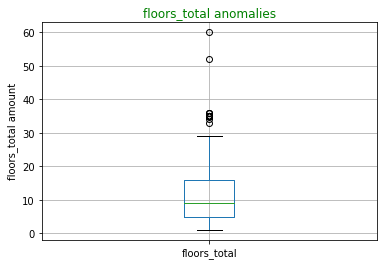

In [77]:
describe_anomalies(data, 'floors_total')

Всё, что выше 32 этажа - не типично, исключим.

In [78]:
data=data[data['floors_total']<=32]
data.shape

(21044, 22)

**floor**

Описание данных:
count    21044.00
mean         5.87
std          4.87
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         27.00
Name: floor, dtype: float64

Диаграмма размаха:
anomalies_line_upper: 17.0
anomalies_line_lower: -7.0


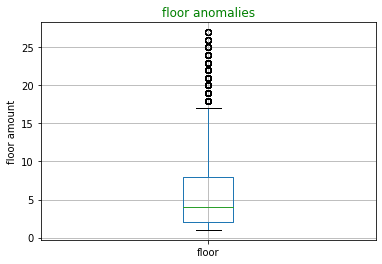

In [79]:
describe_anomalies(data, 'floor')

Проверим как много редких значений встречается в датафрейме:

In [80]:
len(data[data['floor'] > 17])

803

Таких данных не мало.
Также видим, что в большинстве объявлений этаж квартиры не поднимается выше восьмого. Но этаж квартиры - это настолько случайная величина: квартира может располагаться абсолютно на любом этаже.  Поэтому с целью не упустить какие-то важные характеристики предлагаем не удалять выбросы по данному признаку, а посмотреть как они смогут повлиять на результаты исследования и насколько длинный хвост получится в гистограмме.

**living_area**

Описание данных:
count    21044.00
mean        29.93
std         12.68
min          2.00
25%         18.00
50%         29.00
75%         38.80
max        100.00
Name: living_area, dtype: float64

Диаграмма размаха:
anomalies_line_upper: 70.0
anomalies_line_lower: -13.199999999999996


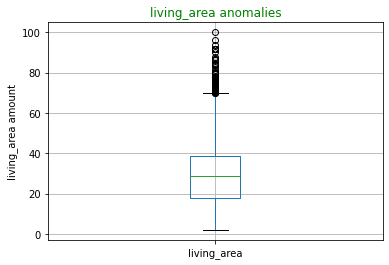

In [81]:
describe_anomalies(data, 'living_area')

Исключим всё, что больше 80 кв.метров:

In [82]:
data = data[data['living_area'] <= 80]
data.shape

(21016, 22)

**kitchen_area**

Описание данных:
count    20824.00
mean         9.45
std          3.52
min          1.30
25%          7.00
50%          9.00
75%         10.80
max         64.00
Name: kitchen_area, dtype: float64

Диаграмма размаха:
anomalies_line_upper: 16.5
anomalies_line_lower: 1.299999999999999


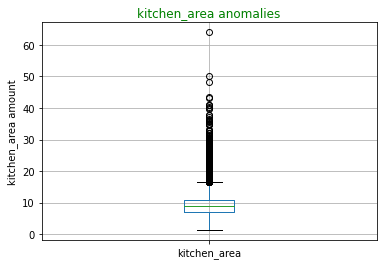

In [83]:
describe_anomalies(data, 'kitchen_area')

In [84]:
pd.set_option('display.max_columns', None)
data[data['kitchen_area']<4].head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category
906,15,2600000.00,27.00,2017-07-10,1,2.75,23,18.00,18,False,False,2.00,0,Санкт-Петербург,22131.00,17459.00,0.00,NaN,1.00,411.00,10.00,город федерального значения
2165,15,3180000.00,25.00,2019-03-21,1,2.50,25,17.00,17,False,False,3.00,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,19.00,поселок
3078,17,6000000.00,43.00,2018-11-12,2,2.90,4,29.30,2,False,False,3.20,0,Санкт-Петербург,22357.00,5247.00,1.00,319.00,2.00,831.00,37.00,город федерального значения


Наблюдается одна особенность минимальный размер кухни - 1,3 кв.м., причем согласно графика и границы нижнего уса - это не аномалия, что странно при медианном значении в 9 квадратов. Если верить объявлениям, то на рынке жилья действительно существуют квартиры с площадью кухни 2 кв. м., Доверимся диаграмме и ограничим площадь кухни только сверху.  
Будем считать, что квартиры с площадью кухни более 20 кв метров - не типичны для большинства, но стоит обратить внимание, что в этом столбце оставались пропущенные значения, которые нужно сохранить.

In [85]:
data = data[(data['kitchen_area'] <= 20) | (data['kitchen_area'].isna())]
data.shape

(20700, 22)

**parks_nearest**

Описание данных:
count    6312.00
mean      486.85
std       323.49
min         1.00
25%       289.00
50%       455.50
75%       613.00
max      3190.00
Name: parks_nearest, dtype: float64

Диаграмма размаха:
anomalies_line_upper: 1099.0
anomalies_line_lower: -197.0


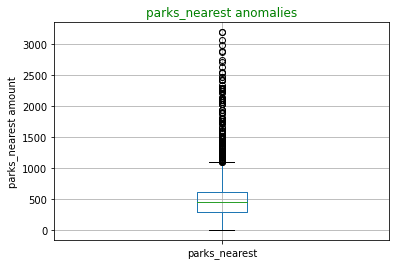

In [86]:
describe_anomalies(data, 'parks_nearest')

Поскольку ближайшим в исследовании признали парк в радусе 3 км и по данному столбцу имеем большое количество пропущенных значений, то уберем все расстояния больше 3000 метров.

In [87]:
data=data[(data['parks_nearest'] <= 3000) | (data['parks_nearest'].isna())]
data.shape

(20697, 22)

**city_centers_nearest, / airports_nearest**

Интересно то, что в описательной статистике видим очень большой размах между минимальными и максимальными значениями. Построим диаграмы размаха по данным признакам:

Описание данных:
count    15335.00
mean     15174.17
std       8487.58
min        208.00
25%      10851.00
50%      13753.00
75%      16788.00
max      65968.00
Name: city_centers_nearest, dtype: float64

Диаграмма размаха:
anomalies_line_upper: 25693.5
anomalies_line_lower: 1945.5


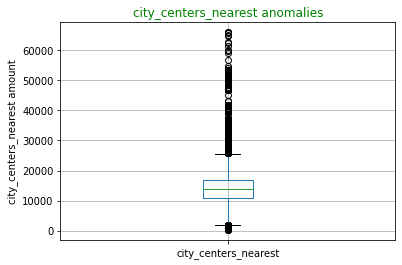

In [88]:
describe_anomalies(data, 'city_centers_nearest')

Интересно, что максимальное расстояние до центра 66 км. Вероятно - это расстояние до центра Санкт-Петербурга из близлежащих населенных пунктов. Проверим какие группы населенных пунктов преобладают в выбросах:

In [89]:
data[data['city_centers_nearest'] > 25000.00]['locality_category'].value_counts()

город                          1426
поселок                         292
город федерального значения      91
Name: locality_category, dtype: int64

Всё верно: преобладают небольшие города и поселки. Целесообразно посмотреть выбросы по группам:

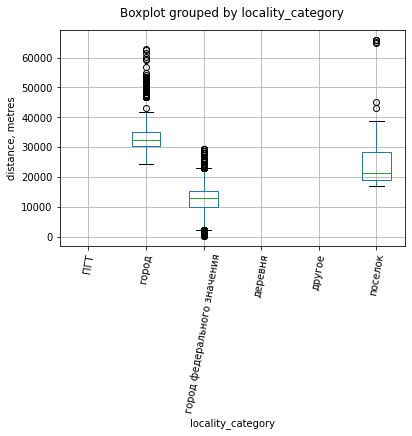

In [90]:
data.boxplot(column='city_centers_nearest', by='locality_category', rot=80)
plt.title('')
plt.ylabel('distance, metres')
plt.show()

Видим, что у всех групп разные медианы, также из боксплота видно, что верхнюю границу примерно в 25 тысяч м(из общей диаграммы) образуют нетипичные значения по городу Санкт-Петербург. То есть:**что является аномалией для Санкт-Петербурга - то будет нормальным значением для остальных групп.** И если исключить данные, ориентируясь на общую диаграмму размаха - исследование, однозначно, потеряет важные данные по маленьким населенным пунктам. В связи с этим предлагаем убрать только "общие" выбросы - более 45000.

In [91]:
data = data[(data['city_centers_nearest'] <= 45000) | (data['city_centers_nearest'].isna())]
data.shape

(20439, 22)

Описание данных:
count    15066.00
mean     28501.91
std      12556.81
min          0.00
25%      17825.50
50%      26890.00
75%      37313.00
max      62111.00
Name: airports_nearest, dtype: float64

Диаграмма размаха:
anomalies_line_upper: 66544.25
anomalies_line_lower: -11405.75


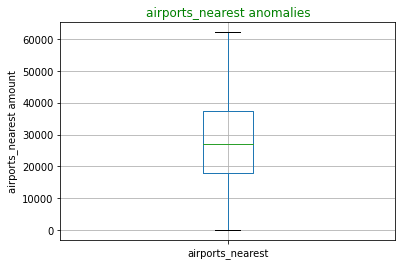

In [92]:
describe_anomalies(data, 'airports_nearest')

Выбросов нет.

**days_exposition**

Описание данных:
count    17996.00
mean       170.22
std        207.97
min          1.00
25%         43.00
50%         90.00
75%        216.00
max       1580.00
Name: days_exposition, dtype: float64

Диаграмма размаха:
anomalies_line_upper: 475.5
anomalies_line_lower: -216.5


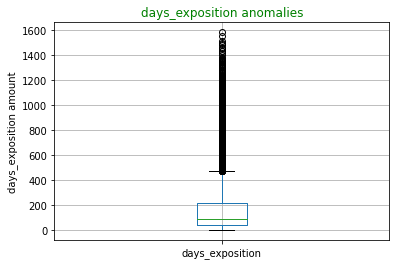

In [93]:
describe_anomalies(data, 'days_exposition')

In [94]:
len(data[data['days_exposition']>475])

1498

Оказывается, квартиры продаются годами. Или продавцы забывают поставить отметку о продаже?  
Объявлений с днями публикаций более 475 дней много, поэтому предлагаем ограничить число дней публикации 2мя годами, дольше квартира точно продаваться не может.

In [95]:
data = data[(data['days_exposition'] <= 730) | (data['days_exposition'].isna())]
data.shape

(19879, 22)

**Вывод:**  
    Данные предобработаны, пропуски восстановлены, где это возможно, столбцы приведены к нужному типу, выявлены и устранены многие аномальные значения. В таблице для исследования осталось 19879 объектов (в результате предобработки отсеяно 16% данных).   
Строго опираться на значение усов диаграммы размаха считаем не всегда целесообразным и при выявлении выбросов стоит использовать "индивидуальный" подход к признакам.  
Также выявлены некоторые важные особенности: например, в картографических данных судя по описательной статистике стандартные отклонения очень большие, но связано это с тем, что **в малых населенных пунктах указано расстояние до центра Санкт-Петербурга и оно, соответственно, намного больше, чем аналогичный показатель в г. Санкт-Петербург, то есть: что является аномалией для Санкт-Петербурга - то будет нормальным значением для остальных групп, поэтому важно проанализировать такие признаки в разрезе категорий населенных пунктов**.

### Расчет необходимых параметров

1. Цена одного квадратного метра:

In [96]:
data['price_one_sq_m'] = data['last_price']/data['total_area']

2. День недели публикации объявления, месяц публикации объявления, год публикации объявления:

In [97]:
# извлекаем номер дня из даты публикации "first_day_exposition" и записываем в столбец "day_publication": 
data['day_publication']=data['first_day_exposition'].dt.weekday
# извлекаем номер месяца из даты публикации "first_day_exposition" и записываем в столбец "month_publication": 
data['month_publication']=data['first_day_exposition'].dt.month
# извлекаем год из даты публикации "first_day_exposition" и записываем в столбец "year_publication": 
data['year_publication']=data['first_day_exposition'].dt.year

3. Чтобы разбить этаж продаваемой квартиры на группы создадим функцию `floor_categorize` и применим к нашим данным:

In [98]:
def floor_categorize (row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'Первый'
    elif floor == floors_total:
        return 'Последний'
    return 'Другой'

data['floor_category']=data.apply(floor_categorize, axis=1)

Проверим что получилось с этажами:

In [99]:
data['floor_category'].value_counts()

Другой       14595
Последний     2700
Первый        2584
Name: floor_category, dtype: int64

Здесь важно отметить, что **если в доме всего один этаж (то есть первый этаж является и последним одновременно), то такие объекты попали** через первую ветку функции **в категорию "Первый"**.

4. Расстояние до центра города в км.

In [100]:
data['distance_city_centers_km'] = (data['city_centers_nearest']/1000).round()

Отследим изменения, выведем случайные 3 строки на экран:

In [101]:
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category,price_one_sq_m,day_publication,month_publication,year_publication,floor_category,distance_city_centers_km
13087,13,6285000.00,50.00,2016-04-02,1,2.70,18,18.00,2,False,False,12.00,0,Санкт-Петербург,45241.00,17964.00,0.00,NaN,0.00,NaN,137.00,город федерального значения,125700.00,5,4,2016,Другой,18.00
7077,6,780000.00,47.40,2019-04-05,2,2.50,5,32.50,3,False,False,6.00,1,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,город,16455.70,4,4,2019,Другой,NaN
13760,12,4400000.00,60.00,2018-10-01,2,2.70,18,33.00,9,False,False,8.80,0,Санкт-Петербург,36763.00,14915.00,0.00,NaN,0.00,NaN,64.00,город федерального значения,73333.33,0,10,2018,Другой,15.00


### Исследовательский анализ данных

#### Изучение параметров объекта

Построим отдельные гистограммы для каждого признака:

**total_area**

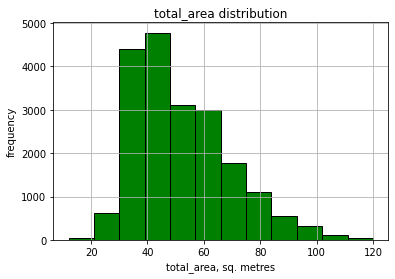

In [102]:
data.hist('total_area', color='green', edgecolor='black', bins=12)
plt.title('total_area distribution')
plt.xlabel('total_area, sq. metres')
plt.ylabel('frequency')
plt.show()

В целом видим, что гистограмма искажена влево. Серединные значения находятся в пределах 40-48 кв.м. (являются пиком на гистограмме). Маленьких картир мало, больших квартир площадью более 80 кв.м.- тоже немного. Основную часть квартир составляют квартиры с общей площадью примерно 30-65 кв.м.   
Чтобы увидеть тонкости распределения этого признака - увеличим число корзин до 50 шт.

Среднее значение по признаку: 51.73847628150309
Медианное значение по признаку: 48.0


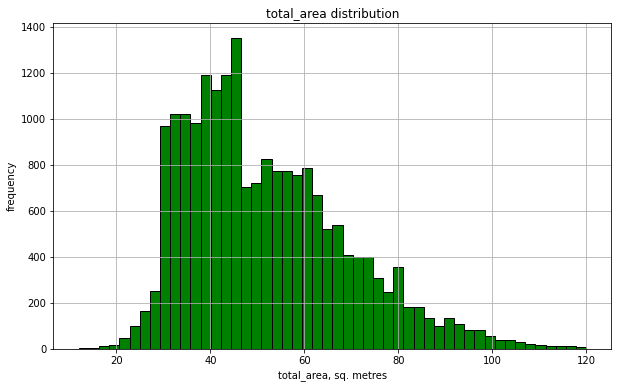

In [103]:
print('Среднее значение по признаку:', data['total_area'].mean())
print('Медианное значение по признаку:', data['total_area'].median())
data.hist('total_area', color='green', edgecolor='black', bins=50, figsize=(10,6))
plt.title('total_area distribution')
plt.xlabel('total_area, sq. metres')
plt.ylabel('frequency')
plt.show()

Теперь на гистограмме отчетливо видна неоднородность распределения. Помимо основного пика (около 44 кв.м.), видим еще несколько наметившихся. Это может свидетельствовать о влиянии других параметров на распределения на признак. На общую площадь квартиры, вероятно, может влиять число комнат. Кажется целесообразным рассматреть признак не в общем, а отдельно среди каждого вида квартир. Поэтому сгруппируем данные по количеству комнат и визуализируем результат:

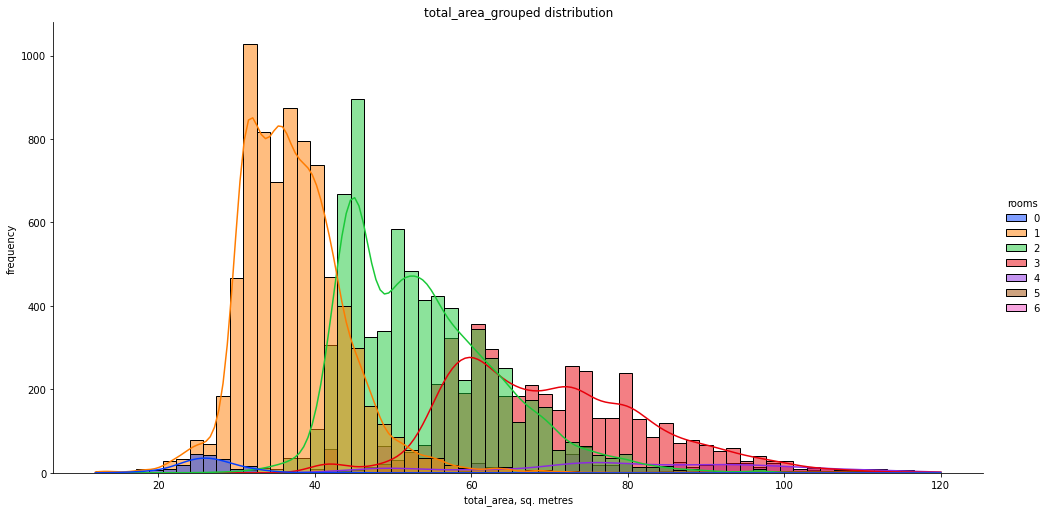

In [104]:
sns.displot(kde=True, x='total_area', hue='rooms', data=data, palette='bright', height=7, aspect=2)
plt.title('total_area_grouped distribution')
plt.xlabel('total_area, sq. metres')
plt.ylabel('frequency')
plt.show()

Небольших квартир до 30 кв. м. в числе объявлений - немного, в том числе квартиры-студии и часть квартир с открытой планировкой.   
В объявлениях отчетливо видно несколько групп квартир (в основном, это 1-комнатные, 2-комнатные, и в меньшей степени 3-комнатные). Так, среди 1-комнатных квартир чаще продаются квартиры общей площадью примерно от 32 до 36 кв.м; среди 2-комнатных - общей площадью около 48 квадратных метров. Среди 3-комнатных - около 60 кв.м, но также с ними могут конкурировать квартиры около 80 кв.м..   
Что касается 4,5 и 6-комнатных кварир, то можем сказать, что таких очень мало.

**living_area**

Среднее значение по признаку: 29.753935384325167
Медианное значение по признаку: 29.0


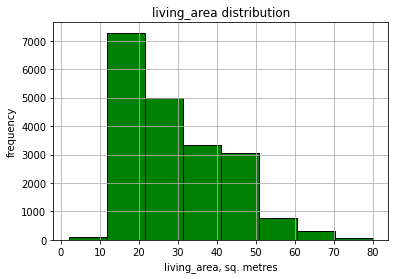

In [105]:
print('Среднее значение по признаку:', data['living_area'].mean())
print('Медианное значение по признаку:', data['living_area'].median())
data.hist('living_area', color='green', edgecolor='black', bins=8)
plt.title('living_area distribution')
plt.xlabel('living_area, sq. metres')
plt.ylabel('frequency')
plt.show()

В целом видим, что гистограмма смещена влево. Пиком на гистограмме являются квартиры с жилой площадью около 12-22 кв.м., чуть меньше квартир площадью около 22-32 кв.м., еще реже вероятность встретить квартиру с жилой площадью 32-50 кв.м. Маленьких картир с жилой площадью меньше 10 кв. м. - мало, больших квартир с жилой площадью более 50 кв.м.- тоже немного. Основную часть квартир составляют квартиры с общей площадью примерно 12-32 кв.м.   
Детализируем распределение этого признака - увеличим число корзин до 60 шт.

Среднее значение по признаку: 29.753935384325167
Медианное значение по признаку: 29.0


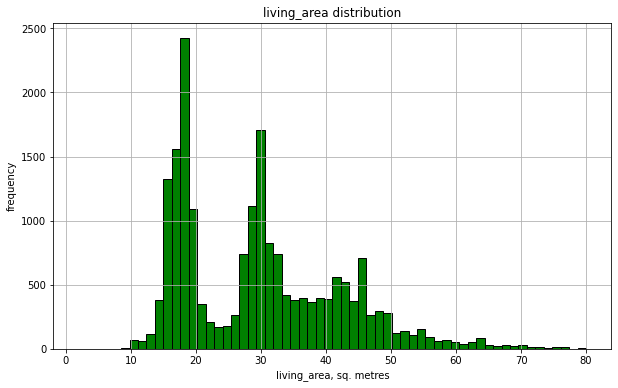

In [106]:
print('Среднее значение по признаку:', data['living_area'].mean())
print('Медианное значение по признаку:', data['living_area'].median())
data.hist('living_area', color='green', edgecolor='black', bins=60, figsize=(10,6))
plt.title('living_area distribution')
plt.xlabel('living_area, sq. metres')
plt.ylabel('frequency')
plt.show()

Сразу видим два пика, и намечающийся третий. Совокупность - явно неоднородная. Поищем в этом влияние другого признака. Также разобьем исследуемую совокупность на группы по числу комнат и построим график.

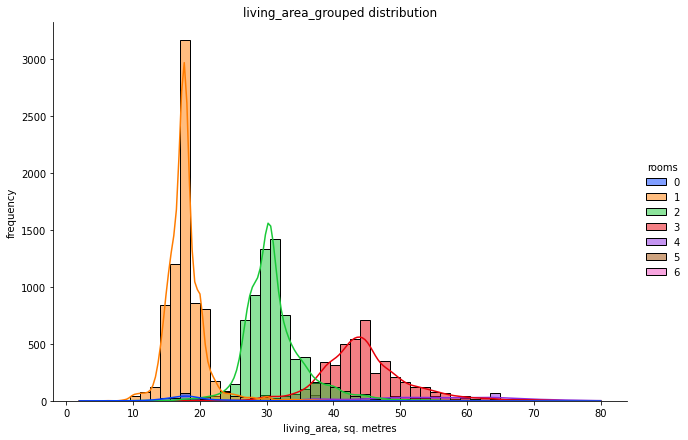

In [107]:
sns.displot(kde=True, x='living_area', hue='rooms', data=data, palette='bright', height=6, aspect=1.5)
plt.title('living_area_grouped distribution')
plt.xlabel('living_area, sq. metres')
plt.ylabel('frequency')
plt.show()

Четко видно как совокупность также распадается на 3 основные группы. 
Для 1-комнатных квартир наиболее типична жилая площадь в размере около 16 кв.м.; для 2-комнатных - 30-32 кв.м и для 3-комнатных - около 45 кв.м.   
Распределение внутри групп выглядит, относительно, симметрично.

**kitchen_area**

Среднее значение по признаку: 9.204807008633823
Медианное значение по признаку: 9.0


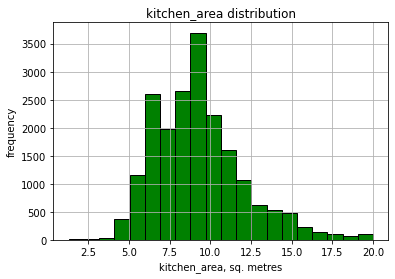

In [108]:
print('Среднее значение по признаку:', data['kitchen_area'].mean())
print('Медианное значение по признаку:', data['kitchen_area'].median())
data.hist('kitchen_area', color='green', edgecolor='black', bins=20)
plt.title('kitchen_area distribution')
plt.xlabel('kitchen_area, sq. metres')
plt.ylabel('frequency')
plt.show()

График выглядит более симметричным, чем предыдущие.
Из графика видно, что очень маленькие кухни до 5 кв.м. встречаются редко. Также редкостью для совокупности являются большие кухни площадью 15 кв. м. и более.
Основная масса объявлений - это квартиры с площадью кухни 6-10 кв.м. Вероятность найти квартиру с площадью кухни 9-10 кв. м. выше, чем в остальных случаях.  
Выбивающийся пик в районе 6 кв.м. может говорить, например, о том, что в базе с объявлениями много 5-этажных домов-хрущёвок, в которых кухня обладают такой квадратурой.

**last_price**

Среднее значение по признаку: 4661372.528698627
Медианное значение по признаку: 4300000.0


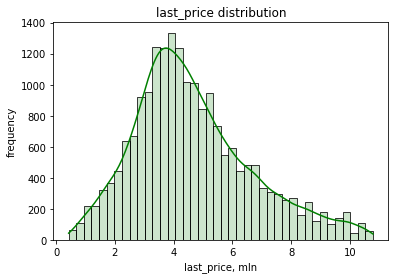

In [109]:
print('Среднее значение по признаку:', data['last_price'].mean())
print('Медианное значение по признаку:', data['last_price'].median())
sns.histplot(x=data['last_price']/1000000, data=data, kde=True, bins=40, color='green', alpha=0.2)
plt.title('last_price distribution')
plt.xlabel('last_price, mln')
plt.ylabel('frequency')
plt.show()

Конечно, такое распределение нельзя назвать абсолютно симметричным, но имеем дело с распределением, тяготеющим к нормальному виду.   
Из графика видно, что саммыми распространенными в числе объявлений являются квартиры общей стоимостью около 4 млн. рублей. Квартир с низкой стоимостью менее 2 млн. - относительно мало. Также видим: начиная от 5 млн - чем больше стоит квартира, тем меньше таких вариантов.

**rooms**

Для визуализации числа комнат предлагаем использовать столбчатую диаграмму, она для этой цели подойдет лучше.

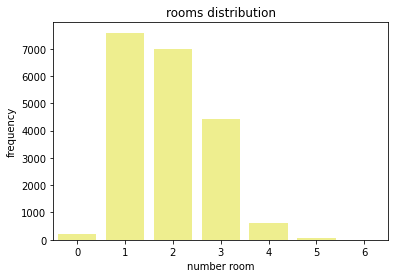

In [110]:
sns.countplot(x=data['rooms'], color='yellow', alpha=0.5 )
plt.title('rooms distribution')
plt.xlabel('number room')
plt.ylabel('frequency')
plt.show()

В исследовании принимают участие квартиры, состоящие из 1, 2, 3, 4, 5, 6 комнат и квартир-студий плюс квартир с открытой планировкой (обозначены 0 комнат), о которых выяснили на этапе предобработки данных.   
Чаще всего в исследовании встречаются 1-комнатные квартиры (составляют 38%), чуть менее часто - 2-х комнатные (составляют 35%), реже - з-комнатные(22%). Что касается других типов квартир, то их очень мало (все эти группы вместе составляют 5%).

**ceiling_height**

Среднее значение по признаку: 2.6726344383520297
Медианное значение по признаку: 2.6


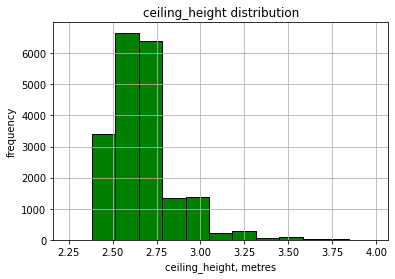

In [111]:
print('Среднее значение по признаку:', data['ceiling_height'].mean())
print('Медианное значение по признаку:', data['ceiling_height'].median())
data.hist('ceiling_height', color='green', edgecolor='black', bins=13)
plt.title('ceiling_height distribution')
plt.xlabel('ceiling_height, metres')
plt.ylabel('frequency')
plt.show()

Средняя высота потолков составляет 2,67 метров.   
Характер распределения ассиметричный, виден перекос и  длинный хвост, вызанный наличием высоких значений.   
Квартир с потолками выше 3 метров - мало. Есть совсем немного квартир с высотой потолков около 2,25 метров.   
В половине объявлений высота потолков не превышает 2,63 метров. Больше всего объявлений содержат высоту потолков от 2,5 до 2,8 м.


**floors_total**

In [112]:
data['floors_total'].max()

29

Поскольку максимальной этажностью в таблице является 29-этажный дом, разобьем гистограмму на 29 корзин: чтобы 1 корзина примерно соответствовала 1 типу этажности.

Среднее значение по признаку: 10.79817898284622
Медианное значение по признаку: 9.0


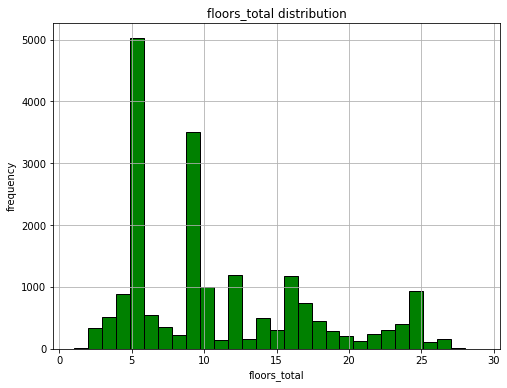

In [113]:
print('Среднее значение по признаку:', data['floors_total'].mean())
print('Медианное значение по признаку:', data['floors_total'].median())
data.hist('floors_total', color='green', edgecolor='black', bins=29, grid=True, figsize=(8,6))
plt.title('floors_total distribution')
plt.xlabel('floors_total')
plt.ylabel('frequency')
plt.show()

Распределение этажности домов - не равномерное. Есть два явных пика, судя по которым следует, что наиболее типичны для совокупности дома с этажностью 5-9 этажей. Вероятно ими могут оказаться 5-этажки и 9-этажки.   
Здания высотой ниже 4 этажей редки. Также редки дома высотой выше 25 этажа.
С целью убедиться в нашем предположении сгруппируем данные по этажности домов и выведем на экран 2 самых популярных.

In [114]:
data.groupby('floors_total')['floors_total'].count().sort_values(ascending=False).head(2)

floors_total
5    5021
9    3502
Name: floors_total, dtype: int64

Предположение подтверждено: среди объявлений чаще всего встречаются 5-этажные и 9-этажные дома.

**floor**

Среднее значение по признаку: 5.895819709240907
Медианное значение по признаку: 4.0


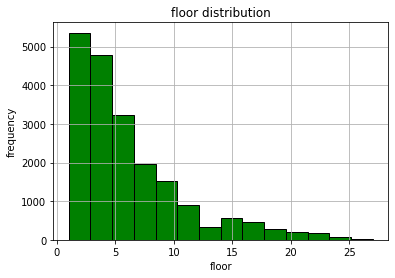

In [115]:
print('Среднее значение по признаку:', data['floor'].mean())
print('Медианное значение по признаку:', data['floor'].median())
data.hist('floor', color='green', edgecolor='black', bins=14 )
plt.title('floor distribution')
plt.xlabel('floor')
plt.ylabel('frequency')
plt.show()

Распределение имеет ассиметричную форму, схожую с распределением Пуассона.    
Основная масса квартир на продажу расположена ниже 5го этажа. Реже можно встретить объявления на 5-10 этаже. (Это можно объяснить преобладанием 5-этажных и 9-этажных домов в объявлениях). 
Также можно заметить, что чем выше становится этаж, тем, в целом, меньше вероятность его встретить. Таким образом квартир выше 15го этажа совсем мало.

**floor_category**

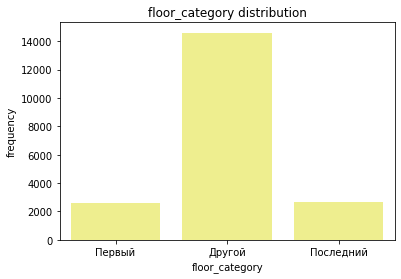

In [116]:
sns.countplot(x=data['floor_category'], color='yellow', alpha=0.5 )
plt.title('floor_category distribution')
plt.xlabel('floor_category')
plt.ylabel('frequency')
plt.show()

Подавляющее большинство вариантов квартир находится между первым и последним этажом.   
Частота обявлений на первом и последнем этаже примерно одинакова.

**city_сenters_nearest**

Среднее значение по признаку: 14593.518165087587
Медианное значение по признаку: 13673.0


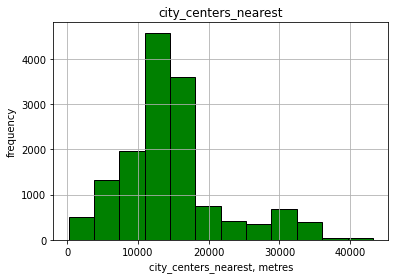

In [117]:
print('Среднее значение по признаку:', data['city_centers_nearest'].mean())
print('Медианное значение по признаку:', data['city_centers_nearest'].median())
data.hist('city_centers_nearest', color='green', edgecolor='black', bins=12, grid=True)
plt.title('city_centers_nearest')
plt.xlabel('city_centers_nearest, metres')
plt.ylabel('frequency')
plt.show()

Насколько мы помним, большую часть объявлений составляют объявления г. Санкт-Петербург. Сам Санкт-Петербург имеет достаточно большую протяженность, поэтому медианное расстояние в 13600 м выглядит правдоподобно.
В целом мы видим, что есть квартиры, расположенные очень близко к центру, есть, которые немного дальше(около 5 км), а и есть те, которые от него находятся на расстоянии 30 км и более, но таких значений мало. Основная масса квартир находится по отношению к центру в радиусе примерно 11-17 км. 
Также заметен небольшой пик в районе 30000 м.  
На этапе предобработки была замечена особенность в связи с которой стоит сгруппировать данные по категории населенного пункта и построить по ним гистограмму:

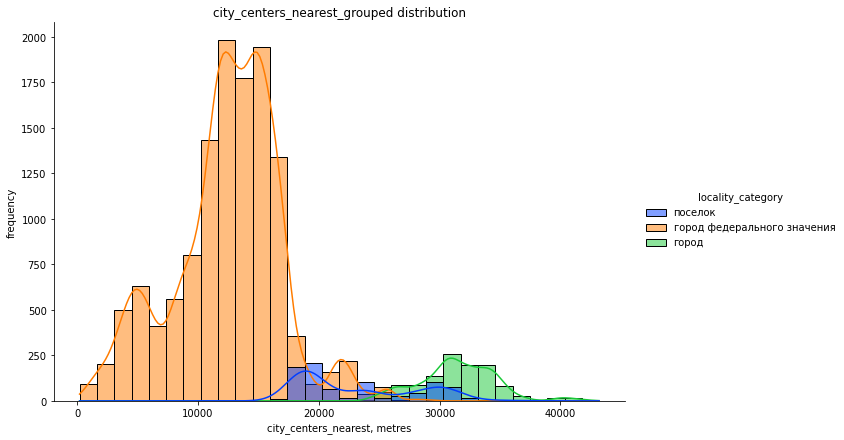

In [118]:
sns.displot(
    kde=True, x='city_centers_nearest', hue='locality_category', 
    data=data[(data['locality_category']=='город федерального значения') | 
              (data['locality_category']=='город') | 
              (data['locality_category']=='поселок')] , 
    palette='bright', height=6, aspect=1.5, bins=30
)
plt.title('city_сenters_nearest_grouped distribution')
plt.xlabel('city_сenters_nearest, metres')
plt.ylabel('frequency')
plt.show()

Видим, что объявления из Санкт-Петербурга - это действительно основная масса. Видим также, что распределение по нему имеет несколько пиков, но самым значимым является пик примерно в 11000 и 15000 м.  
Небольшие города расположены в примерно от 25000 м и дальше от центра, поселки от 18  до 35000 м. Среди каждой группы есть свой пик, который как раз соответствует маленьким, слегка заметным пикам на общей гистограмме.

**airports_nearest**

Среднее значение по признаку: 28538.63165075034
Медианное значение по признаку: 26943.0


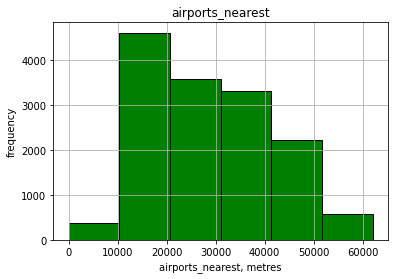

In [119]:
print('Среднее значение по признаку:', data['airports_nearest'].mean())
print('Медианное значение по признаку:', data['airports_nearest'].median())
data.hist('airports_nearest', color='green', edgecolor='black', bins=6, grid=True)
plt.title('airports_nearest')
plt.xlabel('airports_nearest, metres')
plt.ylabel('frequency')
plt.show()

Есть немного объявлений квартир, находящихся недалеко от аэропорта (в радиусе 10 км).  
Основную часть объявлений составляют квартиры, находящиеся от аэропорта на расстоянии 10-20 км. Что касается квартир, которые расположены дальше 20 км, то здесь прослеживается тенденция: чем дальше квартира от аэропорта, тем меньше таких объявлений.


**parks_nearest**

Среднее значение по признаку: 485.947280891402
Медианное значение по признаку: 456.0


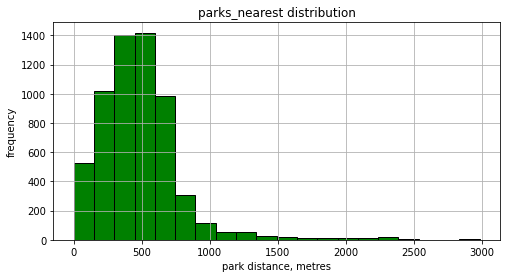

In [120]:
print('Среднее значение по признаку:', data['parks_nearest'].mean())
print('Медианное значение по признаку:', data['parks_nearest'].median())
data.hist('parks_nearest', color='green', edgecolor='black', bins=20, grid=True, figsize=(8,4))
plt.title('parks_nearest distribution')
plt.xlabel('park distance, metres')
plt.ylabel('frequency')
plt.show()

In [121]:
data['parks_nearest'].min()

1.0

Основная часть квартир из объявлений расположена от парка на расстоянии около 500 метров, что соответствует среднему и медианному значению. Квартиры, расположенные на расстоянии более 1 км - не типичны для совокупности. Интересно, что есть значения, близкие к 0. Минимальное расстояние от дома до парка составляет 1 метр. Возможно - так и есть.

**day_publication, /month_publication**

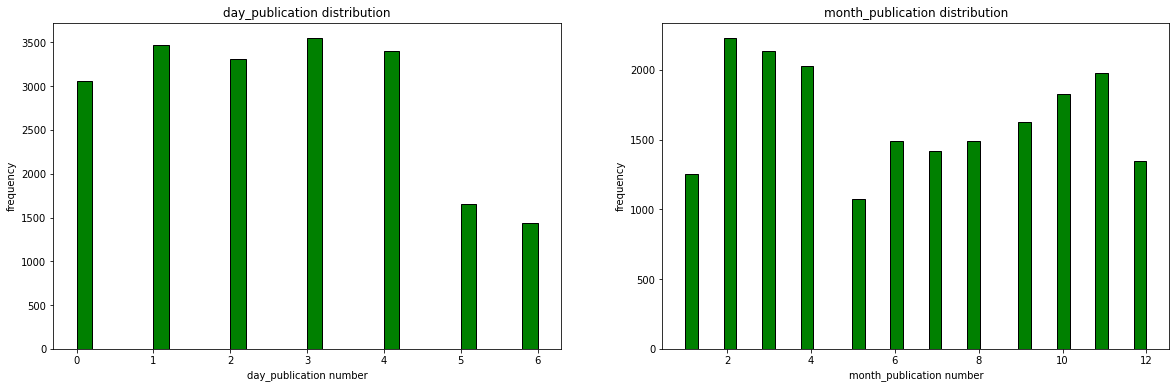

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

ax1.hist(data['day_publication'], color='green', edgecolor='black', bins=30)
ax1.set_title('day_publication distribution')
ax1.set_xlabel('day_publication number')
ax1.set_ylabel('frequency')

ax2.hist(data['month_publication'], color='green', edgecolor='black', bins=36)
ax2.set_title('month_publication distribution')
ax2.set_xlabel('month_publication number')
ax2.set_ylabel('frequency')
plt.show()

Чаще всего объявления о продаже выставляются в феврале. Также достаточно часто это происходит в марте, апреле и ноябре. Самый спад подачи объявлений происходит в мае.  
Что касается дня недели, то здесь четкой зависимости не прослеживается, но можно сказать, что объявления в будни, подаются намного чаще, чем в выходные. 

#### Как долго продаются квартиры

Для изучения параметра `days_exposition` построим гисторгамму, выведем среднее и медиану, минимум и максимум.

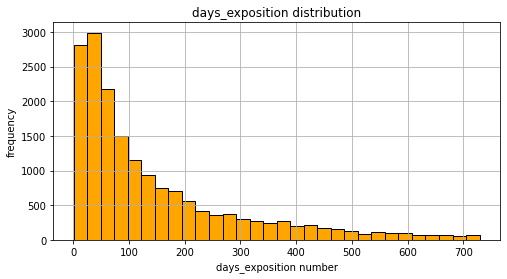

Описательные данные по признаку:
count    17436.00
mean       145.00
std        152.42
min          1.00
25%         42.00
50%         85.00
75%        197.00
max        729.00
Name: days_exposition, dtype: float64


In [123]:
# строим гистограмму
data.hist('days_exposition', color='orange', edgecolor='black', bins=30, grid=True, figsize=(8,4))
plt.title('days_exposition distribution')
plt.xlabel('days_exposition number')
plt.ylabel('frequency')
plt.show()

# выводим описательную статистику
print('Описательные данные по признаку:')
print( data['days_exposition'].describe())

На графике виден длинный хвост и перекос, вызванный наличием высоких значений. Средние значение по признаку в 145 дней из-за наличия такого факта смещено вправо, поэтому оно намного больше медианы. То есть, в среднем, квартира продается за 145 дней. Но медиана нам говорит о том, что у половины продавцов покупатели находятся не более, чем за 85 дней, в связи с этим ориентироваться на на такое среднее не можем.
Судя по графику, продажи продолжителностью более 200 дней становятся редкими и нехарактерными для совокупности. А более 600 дней вообще стремятся к нулю. С другой стороны, также видно довольно много значений около 0 дней, что выглядит очень странно, минимальное время продажи квартир - 1 день.  
Для оценки времени продажи рассчитаем границы размаха:

In [124]:
# вычисляем первый квартиль
q1 = data['days_exposition'].quantile(0.25)
# вычисляем третий квартиль
q3 = data['days_exposition'].quantile(0.75)
print('Верхняя граница размаха:', 1.5*(q3-q1)+q3)
print('Нижняя граница размаха:', 1.5*(q1-q3)+q1)

Верхняя граница размаха: 429.5
Нижняя граница размаха: -190.5


Сделаем срез данных, откинув все продажи, продолжительностью более 430 дней и посчитаем медиану и среднее значение по выборке:

In [125]:
print('Медиана:', data.query('days_exposition < 430')['days_exposition'].median())
print('Среднее:', data.query('days_exposition < 430')['days_exposition'].mean())

Медиана: 74.0
Среднее: 113.15966334550406


Таким образом, нормальными можно считать продажи, которые в среднем занимают около 113 дней. Все продажи длительностью более 430 дней можно считать необычайно долгими. Что касается необычайно быстрых продаж, то здесь все значения находятся в пределах допустимого размаха, но логически продажи, которые занимают менее 5 дней - выглядят необычайно быстрыми.

#### Изучение влияния различных факторов на стоимость объекта

С целью изучения влияния факторов на стоимость объекта сначала построим матрицу корреляции и проанализируем наличие линейной связи между ними.

In [126]:
cols=['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_category']
data[cols].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.00,0.67,0.54,0.44,0.43
total_area,0.67,1.00,0.90,0.38,0.81
living_area,0.54,0.90,1.00,0.11,0.90
kitchen_area,0.44,0.38,0.11,1.00,-0.01
rooms,0.43,0.81,0.90,-0.01,1.00


Видим наличие не сильно тесной прямой линейной связи стоимости с общей, жилой площадью, площадью кухни и числом комнат. С остальными показателями линейной связи нет, но это не означает, что ее нет вовсе.   
Для выявления взаимосвязей построим диаграмму рассеяния по каждому из количественных признаков и стоимостью квартиры (для удобства создадим функцию `scatter_func`.

In [127]:
def scatter_func (df, col1, col2):
    df.plot(x=col1, y=col2, kind='scatter', alpha=0.05, figsize=(8,5))
    plt.title('scatterplot '+str(col1)+' and '+ str(col2))
    plt.xlabel(str(col1))
    plt.ylabel(str(col2))
    plt.show()              

**total_area**

*Гипотеза: чем больше общая площадь квартиры, тем выше цена на нее.*  

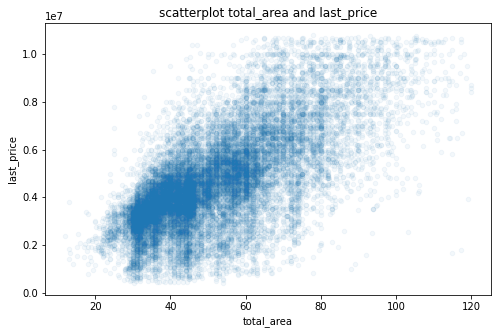

In [128]:
scatter_func(data, 'total_area', 'last_price') #Применяем функцию для построения графика

Видим самое "плотное" облако точек в диапазоне цен от 2 до 6 млн и общей площадью около 70 кв.м. Стоит отметить, что среди вариантов есть и аномальные значения, которые выбиваются из облака, но большая часть сосредоточена в одном месте.
В целом можем сказать, что чем больше общая площадь квартиры, тем больше она стоит. Наличие прямой линейной связи доказано.

**living_area**

*Гипотеза: чем больше жилая площадь квартиры, тем выше цена на нее.*  

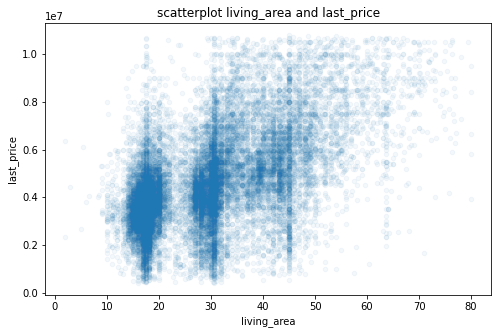

In [129]:
scatter_func(data, 'living_area', 'last_price') #Применяем функцию для построения графика

На графике совокупность точек чётко разбилась на группы, что очень напоминает наше исследование при построении гистограмм. Вероятно, эти группы означают число комнат. Попробуем изобразить этот же график в разбивке на группы:

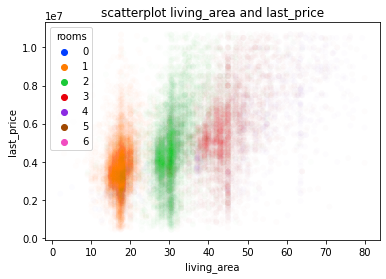

In [130]:
sns.scatterplot(x='living_area', y='last_price', hue='rooms', data=data, palette='bright', alpha=0.01)
plt.title('scatterplot living_area and last_price')
plt.xlabel('living_area')
plt.ylabel('last_price')
plt.show()

Все верно - это разная численность комнат.   
Также подтверждаем преобладание 1,2 и 3-комнатных квартир среди объявлений.
Можно отметить, что 1-комнатные квартиры, в целом, дешевле, чем остальные (не считая студий). Хотя и 3-комнатные дороже 2-комнатных.  
Косвенно прослеживается такая же взаимосвязь, как и с общей площадью, но слабее.

**kitchen_area**

*Гипотеза: чем больше площадь кухни, тем выше стоимость квартиры.*

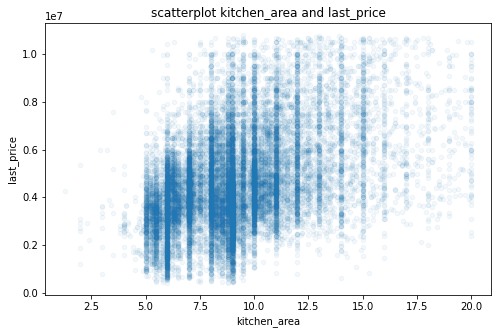

In [131]:
scatter_func(data, 'kitchen_area', 'last_price') #Применяем функцию для построения графика

Видны четкие полосы на графике примерно на одинаковом расстоянии друг от друга - напоминает столбчатую диаграмму. Интересно, что все эти полосы расположены примерно на целом значении: 5, 6, 7, 8 и т.д. Возможно, это связано с тем, что продавцы в момент подачи объявления не указывают дробную часть квадратуры, а округляют до целых, поэтому эти значения становятся так заментны.
Основное сосредоточение - это объявления по квартирам с площадью кухни от 5 до 11 кв.м.    
Четкую зависимость сложно проследить. Точки расположены более хаотично, чем на графике зависимости от общей площади квартиры. Попробуем сгруппировать данные по числу комнат:

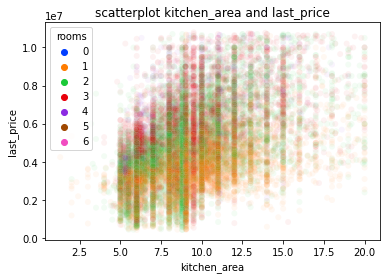

In [132]:
sns.scatterplot(x='kitchen_area', y='last_price', hue='rooms', data=data, palette='bright', alpha=0.05)
plt.title('scatterplot kitchen_area and last_price')
plt.xlabel('kitchen_area')
plt.ylabel('last_price')
plt.show()

Если рассматривать площадь кухни отдельно для каждой группы квартир по числу комнат, можно уловить легкую связь: чем больше площадь кухни в группе по 1 и 2-комнатным квартирам, тем выше цена.

**rooms**

*Гипотеза: чем больше комнат, тем выше стоимость квартиры*

С целью проследить закономерность стоимости от числа комнат, сгруппируем квартиры по числу комнат и найдем среднее значение стоимости квартиры. По полученным данным построим график:

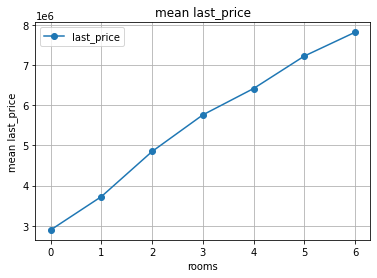

In [133]:
(
    data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
    .plot(title='mean last_price', style='o-', grid=True)
) 
plt.ylabel('mean last_price')
plt.show()

Наблюдается прямая линейная зависимость: **чем больше число комнат, тем дороже стоит квартира.**

**floor_category**

*Гипотеза: квартиры на первом и последнем этаже стоят дороже.*

С целью проследить закономерность стоимости от категории этажа, сгруппируем квартиры по группе этажа и найдем среднее значение стоимости квартиры по группе. По полученным данным построим график:

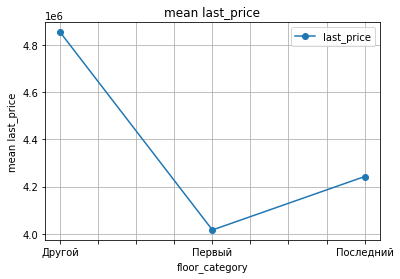

In [134]:
(
    data.pivot_table(index='floor_category', values='last_price', aggfunc='mean')
    .plot(title='mean last_price', style='o-', grid=True)
) 
plt.ylabel('mean last_price')
plt.show()

**Квартиры на первом этаже и на последнем стоят дешевле.** Квартиры на верхнем этаже стоят, в среднем, дороже, чем квариры на первом.   
Таким образом, самые экономически выгодные варианты расположены на первом этаже.

**day_publication, / month_publication, / year_publication**

*Гипотеза: самые высокие цены на квартиры в декабре.*

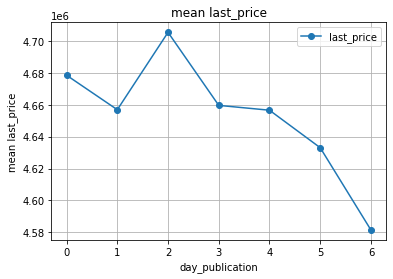

In [135]:
(
    data.pivot_table(index='day_publication', values='last_price', aggfunc='mean')
    .plot(title='mean last_price', style='o-', grid=True)
) 
plt.ylabel('mean last_price')
plt.show()

Четкая зависимость стоимости от дня недели не прослеживается, но **в выходные дни стоимость квартир чуть ниже.**

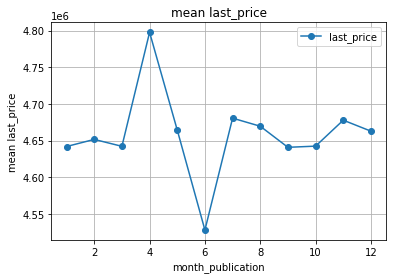

In [136]:
(
    data.pivot_table(index='month_publication', values='last_price', aggfunc='mean')
    .plot(title='mean last_price', style='o-', grid=True)
) 
plt.ylabel('mean last_price')
plt.show()

Если говорить о зависимости цены от месяца, то здесь стоит отметить интересный момент: **в апреле цены находятся на пике, а в июне происходит резкий обвал** размером примерно в 300 тыс. Стоит вспомнить, что максимальное количество объявлений подается с февраля по апрель, тем саммым, возможно, рынок ими перенасыщается, цена в этот период как раз выходит на свой пик. Далее в мае и июне начинается пора дач и отпусков, у людей не хватает времени на то, чтобы заниматься продажей и покупкой квартиры. Таким образом, новые квартиры в объявлениях появляются реже, а старые - хуже продаются, и рынок, подстраиваясь под ситуацию снижает цену.

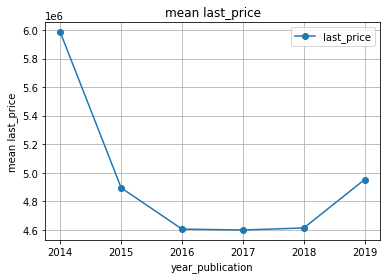

In [137]:
(
    data.pivot_table(index='year_publication', values='last_price', aggfunc='mean')
    .plot(title='mean last_price', style='o-', grid=True)
) 
plt.ylabel('mean last_price')
plt.show()

Что касается года, то здесь видим, скорее, историческую особенность: в 2014 году цены были самыми высокими, что, вероятно, обусловлено финансовым кризисом того года. Далее цены постепенно пришли к снижению и к 2019 пошли на легкое повышение.   
В целом цена от самого года вряд ли зависит, скорее она зависит от других факторов, которые влияют на нее в определенном году.

#### Средняя цена одного квадратного метра

*Гипотеза: самые дорогие квартиры находятся в Санкт-Петербурге.*

Выберем из датасета 10 населенных пуктов с наибольшим числом объявлений и рассчитаем среднюю стоимость квадратного метра среди этих групп, срез сохраним в `top_10`:

In [138]:
# группируем данные по названию населенного пункта, определяем количество объявлений в группе и среднее значение стоимости 1 кв.м. в группе
top_10 = data.pivot_table(index='locality_name', values='price_one_sq_m', aggfunc=['count', 'mean'])
# переименовываем столбцы в сводной таблице
top_10.columns=['all_publication', 'mean_price_one_sq_m']
# отбираем 10 групп с наибольшим числом объявлений
top_10 = top_10.sort_values(by='all_publication', ascending=False).head(10)
top_10

,all_publication,mean_price_one_sq_m
locality_name,,
Санкт-Петербург,12668,104726.56
поселок Мурино,534,85770.22
поселок Шушары,423,78558.67
Всеволожск,372,66874.03
Колпино,325,75164.34
поселок Парголово,317,90142.03
Пушкин,313,99653.70
Гатчина,285,68703.11
деревня Кудрово,267,93011.57


Виден большой разрыв между количеством объявлений, которые подаются в Санкт-Петербурге и в других населенных пунктах. Чтобы отследить что происходит с ценой за квадратный метр в самых популярных населенных пунктах, построим столбчатую диаграмму:

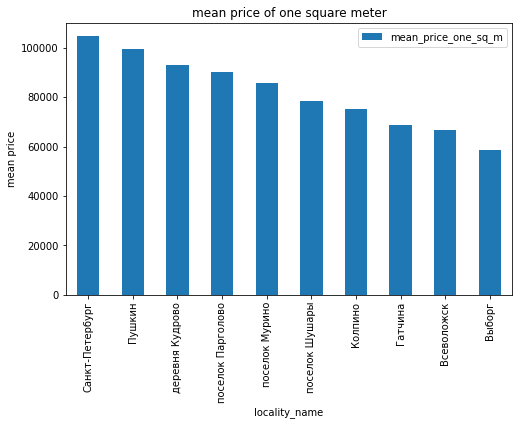

In [139]:
top_10 = top_10.sort_values(by='mean_price_one_sq_m', ascending=False)
top_10.plot(kind='bar', y='mean_price_one_sq_m', title='mean price of one square meter', figsize=(8,5))       
plt.ylabel('mean price')
plt.show()

Среди самых популярных населенных пуктов **наиболее дорогая недвижимость находится в г. Санкт-Петербурге, средняя цена за квадратный метр составляет 104726.56 руб, а самая недорогая среди них - в Выборге, средняя цена за квадратный метр - 58425.37 рублей.**

#### Средняя цена каждого километра

*Гипотеза: Квартиры, расположенные ближе к центру, стоят дороже.*

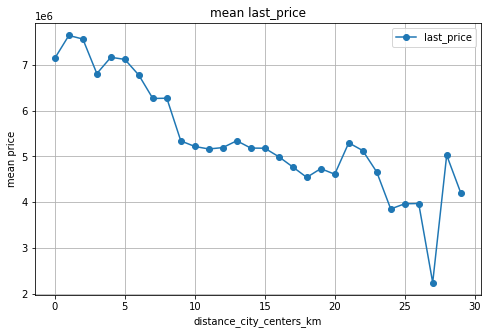

In [140]:
data_distance = data.query('locality_name == "Санкт-Петербург"')
    
(data_distance
    .pivot_table(index='distance_city_centers_km', values='last_price')
    .plot(title='mean last_price', style='o-', grid=True, figsize=(8,5))
)
plt.ylabel('mean price')
plt.show()

Из графика видно, что линия средней цены, в целом, идет плавно. Не явно, но прослеживается зависимость: **чем ближе к центру тем цена выше,** но не везде так происходит. Средняя цена заметно растет на 21 км и резко "обваливается" на 27 и 3 км. Выведем на экран объявления на 27 км:

In [141]:
data_distance.query('distance_city_centers_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category,price_one_sq_m,day_publication,month_publication,year_publication,floor_category,distance_city_centers_km
5961,6,2250000.00,32.00,2018-02-27,1,2.70,2,16.50,2,False,False,7.00,0,Санкт-Петербург,24006.00,27431.00,0.00,NaN,0.00,NaN,178.00,город федерального значения,70312.50,1,2,2018,Последний,27.00


Интересно, что квартира на 27 км всего одна, и среднее значение считалось только по ней. Объект небольшой общей площадью, состоит из 1 комнаты, без парков и водоемов вблизи, еще и на последнем этаже. Все самые "худшие" характеристики для продажи в сборе, это и могло привести к такому выбросу. Если отобрать такие же данные на 3 км, то можно заметить, что среди них часто попадаются квартиры на первом и последнем этаже, что также моло привести к колебаниям цены.

### Выводы по исследованию

Для исследования взята база объявлений по продаже недвижимости за 6 лет. Из 20 тыс. объявлений, 63% - это объявления города Санкт-Петербург. Остальные 37% распределяются между близлежащими небольшими городами и другими малыми населенными пунктами. Самыми популярными среди объектов являютя однокомнатные и двухкомнатные квартиры, реже - трехкомнатные. Квартиры с другим числом комнат встречаются совсем редко. Стоит отметить, что среди объявлений преобладают квартиры, расположенные в пятиэтажных домах.

В процессе исследования проверили 8 гипотез:

1. Увеличение общей площади объекта находится в умеренной прямой линейной связи со стоимостью квартиры. Действительно чем больше общая площадь квартиры, тем выше стоимость объекта. Конечно, есть исключения, но, в целом зависимость заметна. Таким образом, гипотеза подтвердилась.   
2. Явной сильной прямой линейной связи жилой площади со стоимостью квартиры не выявлено. Но жилая площадь тесно связана с числом комнат. Гипотеза полностью не подтверждена.     
3. Увеличение площади кухни само по себе не влечет за собой увеличение стоимости, но рассмотрев показатели в разрезе числа комнат в квартире, можно увидеть интересный момент: среди однокомнатных и двухкомнатных квартир такая зависимость есть. Таким образом, гипотеза подтверждена частично.   
4. Предположение о том, что увеличение числа комнат сопровождается ростом стоимости объекта подтверждено.   
5. Квартиры на первом и последнем этаже стоят действительно меньше, чем другие варианты. Стоит отметить, что квартиры на первом этаже - самые бюджетные. Гипотеза подтвердилась.
6. В среднем, самыми высокими ценами на квартиры являются цены апреля, а самые низкие цены - в июне. Гипотеза не подтвердилась. 
7. Среди населенных пунктов с максимальным числом объявлений, квартиры Санкт-Петербурга - самые дорогие. Стоимость за 1 кв. м. составила 104726,56 руб. Гипотеза подтвердилась.
8. По общему правилу, квартиры, расположенные ближе к центру стоят дороже, но во всех правилах есть исключения. Если обратить внимание на квартиры в центре, расположенные на первом или последнем этаже, то можно найти выгодный вариант. Гипотеза подтвердилась частично.

Также стоит отметить, что в среднем, квартиры продаются в течение 113 дней. А в случае приобритения квартиры стоит обратить внимание на субботние и воскресные варианты - они стоят дешевле.